# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
<br>
 

For many incumbent operators, retaining high profitable customers is the number one business goal.
<br>
 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
<br>
 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
<br>

In [1]:
#importing the required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data
df=pd.read_csv("telecom_churn_data.csv")

# Understanding the Data

In [3]:
df.shape

(99999, 226)

### Data Cleaning

In [4]:
#checking missing values
cl=round(df.isnull().sum()/len(df)*100,2)
print(cl.sort_values(ascending=False).iloc[0:50])

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

We drop all the columns with more than 8% null values.

In [5]:
cols_to_drop=list(cl.loc[cl>8].index)
df=df.drop(cols_to_drop,axis=1)
df.shape

(99999, 186)

In [6]:
cl=round(df.isnull().sum()/len(df)*100,2)
print(cl.sort_values(ascending=False))

loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_og_mou_9           7.75
loc_ic_mou_9            7.75
loc_og_t2t_mou_9        7.75
loc_ic_t2f_mou_9        7.75
roam_ic_mou_9           7.75
ic_others_9             7.75
loc_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
offnet_mou_9            7.75
loc_ic_t2t_mou_9        7.75
std_ic_mou_9            7.75
onnet_mou_9             7.75
og_others_9             7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2m_mou_9        7.75
std_og_t2f_mou_9        7.75
loc_og_t2f_mou_9        7.75
std_og_t2c_mou_9        7.75
spl_ic_mou_9            7.75
isd_og_mou_9            7.75
loc_og_t2c_mou_9        7.75
spl_og_mou_9            7.75
loc_og_t2m_mou_9        7.75
std_ic_t2m_mou_9        7.75
spl_ic_mou_8            5.38
std_ic_t2f_mou_8        5.38
isd_ic_mou_8            5.38
std_ic_t2o_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2f_mou

In [7]:
df=df.dropna()
df.shape

(84185, 186)

We still have more than 80000 rows left if we drop the rows with null values. Thus, we have quite a large number of samples even when we drop the rows with all the null values and there is no need to impute.

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,108.07,365.47,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,

# Filtering High Value Data

Filtering the High Value Data on the basis of average recharge amount.

We need to predict churn only for the high value customers. The definition for the high value customers as per the problem statement is as follows:
<br>
**High Value Customers**: Those who have recharged with an amount more than or equal to X, where X is the **70th percentile** of the average recharge amount in the first two months (the good phase).

In [9]:
#finding the columns which contain 'rech' keyword
df.loc[:, df.columns.str.contains('rech')]

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014
5,2,2,3,3,120,0,130,130,120,0,130,130,6/19/2014,7/17/2014,8/24/2014,9/28/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,3,4,2,3,120,200,260,110,60,110,130,50,6/27/2014,7/31/2014,8/25/2014,9/28/2014
99992,3,9,19,17,60,180,240,220,30,30,20,20,6/27/2014,7/30/2014,8/30/2014,9/30/2014
99994,2,3,2,2,60,110,0,50,60,110,0,50,6/3/2014,7/20/2014,8/26/2014,9/25/2014
99995,5,3,2,1,110,110,182,30,110,110,149,30,6/17/2014,7/17/2014,8/24/2014,9/26/2014


In [10]:
df['average_rech_amt_g']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2
x=df['average_rech_amt_g'].quantile(0.70)
fdf=df.loc[df['average_rech_amt_g']>=x]

In [11]:
fdf.shape

(25335, 187)

In [12]:
fdf.info(verbose=3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 8 to 99988
Data columns (total 187 columns):
mobile_number           int64
circle_id               int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
last_date_of_month_9    object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
ro

In [13]:
fdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_g
count,2.533500e+04,25335.0,25335.0,25335.0,25335.0,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.0,25335.0,25335.0,25335.0,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.0,25335.0,25335.0,2

In [14]:
fdf['mobile_number'].nunique()

25335

- We notice many columns which have the same minimum and maximum values which implies that these columns do not have any variance. Thus, we drop these columns.
- We also drop the mobile_number column since it is a unique ID column

In [15]:
#dropping the mobile_number column
fdf=fdf.drop('mobile_number',axis=1)

#dropping the columns with same min and max values
num_col=list(fdf.select_dtypes(include=[np.int64,np.float64]).columns)
for col in num_col:
    mi=fdf[col].min()
    ma=fdf[col].max()
    if mi==ma:
        fdf=fdf.drop(col,axis=1)

In [16]:
fdf.shape

(25335, 174)

In [17]:
fdf.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_g
count,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00

# Tag Churners

**Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:** Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [18]:
#tagging Churn
fdf['Churn'] = np.where((fdf['total_ic_mou_9']==0) & (fdf['total_og_mou_9']==0) & (fdf['vol_2g_mb_9']==0 ) & (fdf['vol_3g_mb_9']==0),1,0)

In [19]:
fdf[(fdf['total_ic_mou_9']==0) & (fdf['total_og_mou_9']==0) & (fdf['vol_2g_mb_9']==0 ) & (fdf['vol_3g_mb_9']==0)][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','Churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
199,0.0,0.0,0.0,0.0,1
590,0.0,0.0,0.0,0.0,1
594,0.0,0.0,0.0,0.0,1
691,0.0,0.0,0.0,0.0,1
763,0.0,0.0,0.0,0.0,1


Thus, we have successfully tagged the Churned Customers.

In [20]:
#dropping all the attributes corresponding to Churn Phase
col9 = [i for i in fdf.columns if i.endswith('_9')]
fdf=fdf.drop(col9,axis=1)

In [21]:
fdf.shape

(25335, 133)

We are now left with 133 columns in fdf.

***Finding the Churn Rate***

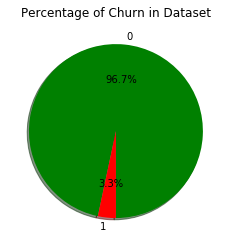

In [22]:
vc=fdf['Churn'].value_counts()
vc=round(vc/len(fdf)*100,2)
colors = ["green","red"] 
labels=["0","1"]
plt.pie(vc, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

Thus, we observe that only 3.3% of the high value customers churn. We have a churn rate of 3.3%.

***Exploring the categorical variables***

In [23]:
cat_col=list(fdf.select_dtypes('object').columns)
cat_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

We convert the Dates to DateTime objects.

In [24]:
for col in cat_col:
    fdf[col]=pd.to_datetime(fdf[col])

We derive the recency of recharge in each month from the last date of each month.

In [25]:
fdf['Recency_6']=fdf['last_date_of_month_6'].dt.day-fdf['date_of_last_rech_6'].dt.day
fdf['Recency_7']=fdf['last_date_of_month_7'].dt.day-fdf['date_of_last_rech_7'].dt.day
fdf['Recency_8']=fdf['last_date_of_month_8'].dt.day-fdf['date_of_last_rech_8'].dt.day

In [26]:
fdf[['Recency_6','Recency_7','Recency_8']]

,Recency_6,Recency_7,Recency_8
8,5,0,1
16,0,0,17
17,0,1,6
21,0,0,0
33,0,1,5
...,...,...,...
99965,0,0,0
99970,0,2,8
99974,1,4,8
99986,10,3,13


***Checking the Recency for each month with Churn Category***

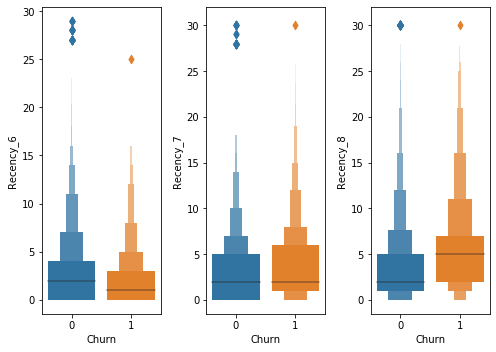

In [27]:
plt.figure(figsize=(7,5))
plt.subplot(1,3,1)
sns.boxenplot(y='Recency_6',x='Churn',data=fdf)
plt.subplot(1,3,2)
sns.boxenplot(y='Recency_7',x='Churn',data=fdf)
plt.subplot(1,3,3)
sns.boxenplot(y='Recency_8',x='Churn',data=fdf)
plt.tight_layout()
plt.show()

**Observation**: Hence, as we transition from good phase to action phase, the probability of Churn increases as the number of days since the last recharge increase.

In [28]:
#dropping the date columns
fdf=fdf.drop(cat_col,axis=1)

In [29]:
fdf_original=fdf.copy()

***Analyzing the numerical variables-Univariate Analysis***

In [30]:
num_col=list(fdf.select_dtypes(include=[np.int64,np.float64]).columns)
len(num_col)

129

In [31]:
fdf.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_g,Churn,Recency_6,Recency_7,Recency_8
count,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000
mean,605.381915,618.668251,580.047979,308.772567,323.663869,294.68391,434.100403,448.695341,410.454928,18.061622,14.346624,14.582006,30.56156,23.280403,23.590945,99.960790,103.126631,95.763798,190.822741,193.354505,183.183204,7.326504,7.524519,7.006037,1.608491,1.905115,1.811716,298.119074,304.014879,285.961925,196.812613,211.379736,189.782722,208.44343,224.532096,197.083311,2.083931,2.132881,1.899306,407.344440,438.049207,388.769519,2.125238,2.191998,2.156

We notice significant outliers in most of the numerical variables. Hence we replace them with the value of the 99th percentile.

In [32]:
for col in num_col:
    x99=fdf[col].quantile(0.99)
    fdf.loc[fdf[col]>x99,col]=x99

In [33]:
fdf.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_g,Churn,Recency_6,Recency_7,Recency_8
count,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.00000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.0,25335.0,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000,25335.000000
mean,596.042485,608.734337,569.220534,299.746434,314.274083,285.23841,426.467300,440.010721,400.299730,15.470800,11.363930,11.719989,26.784824,19.868345,19.557186,91.424953,93.417520,86.711115,185.324725,188.685398,178.688372,6.637273,6.832052,6.352746,1.366624,1.584709,1.56513,290.457419,295.988639,278.827496,188.893570,203.084691,181.480989,200.262643,215.749045,186.863905,1.561267,1.514155,1.375912,398.096635,428.084824,378.015193,0.705094,0.775027,0.593821,5.42

Hence, we observe that all the outliers have been removed.

In [34]:
fdf.shape

(25335, 130)

As noticed before, we have a huge class imbalance in our data. We have only 3.3% of customers who actually Churn. Thus, we use SMOTE Analysis while building our models which would help us in oversampling and increase the instances of minority class.

# Logistic Regression Model

***We first build the logistic regression model to identify the important variables.***

In [35]:
mdf=fdf.copy()

In [36]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 8 to 99988
Columns: 130 entries, arpu_6 to Recency_8
dtypes: float64(129), int32(1)
memory usage: 25.2 MB


All the columns are numerical columns. Hence, we do not need to create dummy variables.

### Defining X and y

In [37]:
X=mdf.drop('Churn',axis=1)
y=mdf['Churn']

### Splitting the data into Training and Test Sets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,stratify=y,random_state=100)

In [40]:
y_train.mean()

0.033269425961430024

In [41]:
y_test.mean()

0.03328509406657019

Hence, we retain the Data imbalance present in our dataset.

### SMOTE Analysis

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
#training set
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1' in training set: {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0' in training set: {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1' in training set: 590
Before OverSampling, counts of label '0' in training set: 17144 

Before OverSampling, the shape of train_X: (17734, 129)
Before OverSampling, the shape of train_y: (17734,) 

After OverSampling, the shape of train_X: (34288, 129)
After OverSampling, the shape of train_y: (34288,) 

After OverSampling, counts of label '1' in training set: 17144
After OverSampling, counts of label '0' in training set: 17144


### Scaling the numerical columns

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
col=list(X_train.columns)
X_train_res[col]=scaler.fit_transform(X_train_res[col])
X_test[col]=scaler.transform(X_test[col])

### Feature Selection using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_res, y_train_res)

In [48]:
col = X_train_res.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'last_day_rch_amt_8', 'aug_vbc_3g',
       'Recency_8'],
      dtype='object')

### Model 1

In [49]:
import statsmodels.api as sm

In [50]:
X_train_sm = sm.add_constant(X_train_res[col])
logm1 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34267
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11872.
Date:                Mon, 27 Jan 2020   Deviance:                       23744.
Time:                        20:13:05   Pearson chi2:                 1.63e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7724      0.030    -26.153      0.000      -0.830      -0.715
onnet_mou_8           -0.3024      0.075     -4.005      0.000      -0.450      -0.154
offnet_mou_8          -0.8432      0.087     -9.744      0.000      -1.013      -0.674
roam_og_mou_8          1.2628      0.036     35.482      0.000       1.193       1.333
loc_og_t2t_mou_7      -0.8546      0.107     -7.982      0.000      -1.064      -0.645
loc_og_t2m_mou_7      -1.4715      0.130    -11.295      0.000      -1.727      -1.216
loc_og_t2m_mou_8       0.5478      0.101      5.413      0.000       0.349       0.746
loc_og_t2f_mou_8      -1.0288      0.076    -13.609      0.000      -1.177      -0.881
loc_og_mou_7           1.5927      0.236      6.739      0.000       1.130       2.056
std_og_t2m_mou_8       0.4768      0.100      4.762      0.000       0.281       0.673
std_og_mou_6           0.7678      0.087      8.860      0.000       0.598       0.938
std_og_mou_7          -0.6107      0.259     -2.354      0.019      -1.119      -0.102
std_og_mou_8           1.4781      0.208      7.111      0.000       1.071       1.885
total_og_mou_6        -0.4091      0.080     -5.105      0.000      -0.566      -0.252
total_og_mou_7         1.0138      0.267      3.791      0.000       0.490       1.538
total_og_mou_8        -1.8334      0.239     -7.657      0.000      -2.303      -1.364
loc_ic_t2f_mou_8      -0.5958      0.059    -10.184      0.000      -0.711      -0.481
loc_ic_mou_8          -1.0597      0.061    -17.306      0.000      -1.180      -0.940
last_day_rch_amt_8    -0.5485      0.024    -23.192      0.000      -0.595      -0.502
aug_vbc_3g            -1.0029      0.050    -20.092      0.000      -1.101      -0.905
Recency_8              0.5310      0.019     27.654      0.000       0.493       0.569
======================================================================================
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
#function to calculate VIF
def vif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train_res[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [53]:
vif(col)

,Features,VIF
13,total_og_mou_7,123.42
10,std_og_mou_7,119.42
7,loc_og_mou_7,82.45
14,total_og_mou_8,67.25
11,std_og_mou_8,35.86
4,loc_og_t2m_mou_7,26.59
1,offnet_mou_8,24.57
8,std_og_t2m_mou_8,24.54
9,std_og_mou_6,19.70
0,onnet_mou_8,18.58


Since total_og_mou_7 has the highest vif value and it is more than 5, we drop this feature.

In [54]:
col=col.drop('total_og_mou_7')

### Model 2

In [55]:
X_train_sm = sm.add_constant(X_train_res[col])
logm2 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34268
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11879.
Date:                Mon, 27 Jan 2020   Deviance:                       23759.
Time:                        20:13:16   Pearson chi2:                 1.51e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7675      0.029    -26.059      0.000      -0.825      -0.710
onnet_mou_8           -0.3520      0.073     -4.806      0.000      -0.496      -0.208
offnet_mou_8          -0.8197      0.086     -9.477      0.000      -0.989      -0.650
roam_og_mou_8          1.2638      0.036     35.573      0.000       1.194       1.333
loc_og_t2t_mou_7      -0.9375      0.108     -8.697      0.000      -1.149      -0.726
loc_og_t2m_mou_7      -1.5745      0.131    -12.012      0.000      -1.831      -1.318
loc_og_t2m_mou_8       0.4576      0.098      4.678      0.000       0.266       0.649
loc_og_t2f_mou_8      -1.0369      0.076    -13.718      0.000      -1.185      -0.889
loc_og_mou_7           2.1508      0.194     11.071      0.000       1.770       2.532
std_og_t2m_mou_8       0.4121      0.098      4.202      0.000       0.220       0.604
std_og_mou_6           0.7290      0.086      8.454      0.000       0.560       0.898
std_og_mou_7           0.3653      0.033     11.005      0.000       0.300       0.430
std_og_mou_8           1.3405      0.202      6.650      0.000       0.945       1.736
total_og_mou_6        -0.3695      0.080     -4.638      0.000      -0.526      -0.213
total_og_mou_8        -1.5975      0.227     -7.033      0.000      -2.043      -1.152
loc_ic_t2f_mou_8      -0.5766      0.058     -9.882      0.000      -0.691      -0.462
loc_ic_mou_8          -1.0646      0.061    -17.382      0.000      -1.185      -0.945
last_day_rch_amt_8    -0.5489      0.024    -23.208      0.000      -0.595      -0.503
aug_vbc_3g            -0.9975      0.050    -20.068      0.000      -1.095      -0.900
Recency_8              0.5319      0.019     27.743      0.000       0.494       0.569
======================================================================================
"""

In [56]:
vif(col)

,Features,VIF
13,total_og_mou_8,57.63
7,loc_og_mou_7,51.40
11,std_og_mou_8,33.23
4,loc_og_t2m_mou_7,25.96
1,offnet_mou_8,24.51
8,std_og_t2m_mou_8,23.67
9,std_og_mou_6,19.14
0,onnet_mou_8,17.92
12,total_og_mou_6,15.42
3,loc_og_t2t_mou_7,14.68


Dropping 'total_og_mou_8' because of high pvalue.

In [57]:
col=col.drop('total_og_mou_8')

### Model 3

In [58]:
X_train_sm = sm.add_constant(X_train_res[col])
logm3 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34269
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11909.
Date:                Mon, 27 Jan 2020   Deviance:                       23819.
Time:                        20:13:26   Pearson chi2:                 1.58e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7416      0.029    -25.423      0.000      -0.799      -0.684
onnet_mou_8           -0.5246      0.065     -8.112      0.000      -0.651      -0.398
offnet_mou_8          -0.8859      0.085    -10.372      0.000      -1.053      -0.718
roam_og_mou_8          1.3139      0.035     37.623      0.000       1.245       1.382
loc_og_t2t_mou_7      -0.7993      0.102     -7.840      0.000      -0.999      -0.599
loc_og_t2m_mou_7      -1.1365      0.114     -9.955      0.000      -1.360      -0.913
loc_og_t2m_mou_8      -0.0196      0.070     -0.280      0.779      -0.157       0.118
loc_og_t2f_mou_8      -1.0586      0.076    -13.986      0.000      -1.207      -0.910
loc_og_mou_7           1.5413      0.170      9.063      0.000       1.208       1.875
std_og_t2m_mou_8       0.3247      0.093      3.481      0.001       0.142       0.507
std_og_mou_6           0.7776      0.084      9.293      0.000       0.614       0.942
std_og_mou_7           0.3700      0.033     11.171      0.000       0.305       0.435
std_og_mou_8           0.1459      0.090      1.619      0.105      -0.031       0.323
total_og_mou_6        -0.4082      0.077     -5.292      0.000      -0.559      -0.257
loc_ic_t2f_mou_8      -0.5682      0.058     -9.729      0.000      -0.683      -0.454
loc_ic_mou_8          -1.1074      0.061    -18.196      0.000      -1.227      -0.988
last_day_rch_amt_8    -0.5439      0.024    -23.062      0.000      -0.590      -0.498
aug_vbc_3g            -1.0030      0.050    -20.128      0.000      -1.101      -0.905
Recency_8              0.5354      0.019     27.951      0.000       0.498       0.573
======================================================================================
"""

Dropping 'loc_og_t2m_mou_8' feature because of high p value.

In [59]:
col=col.drop('loc_og_t2m_mou_8')

### Model 4

In [60]:
X_train_sm = sm.add_constant(X_train_res[col])
logm4 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34270
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11910.
Date:                Mon, 27 Jan 2020   Deviance:                       23819.
Time:                        20:13:32   Pearson chi2:                 1.59e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7410      0.029    -25.469      0.000      -0.798      -0.684
onnet_mou_8           -0.5253      0.065     -8.122      0.000      -0.652      -0.399
offnet_mou_8          -0.8995      0.070    -12.797      0.000      -1.037      -0.762
roam_og_mou_8          1.3177      0.032     40.935      0.000       1.255       1.381
loc_og_t2t_mou_7      -0.7988      0.102     -7.843      0.000      -0.998      -0.599
loc_og_t2m_mou_7      -1.1415      0.113    -10.129      0.000      -1.362      -0.921
loc_og_t2f_mou_8      -1.0605      0.075    -14.063      0.000      -1.208      -0.913
loc_og_mou_7           1.5409      0.170      9.068      0.000       1.208       1.874
std_og_t2m_mou_8       0.3355      0.085      3.949      0.000       0.169       0.502
std_og_mou_6           0.7778      0.084      9.297      0.000       0.614       0.942
std_og_mou_7           0.3707      0.033     11.221      0.000       0.306       0.435
std_og_mou_8           0.1461      0.090      1.620      0.105      -0.031       0.323
total_og_mou_6        -0.4085      0.077     -5.297      0.000      -0.560      -0.257
loc_ic_t2f_mou_8      -0.5676      0.058     -9.723      0.000      -0.682      -0.453
loc_ic_mou_8          -1.1133      0.057    -19.449      0.000      -1.225      -1.001
last_day_rch_amt_8    -0.5440      0.024    -23.080      0.000      -0.590      -0.498
aug_vbc_3g            -1.0027      0.050    -20.128      0.000      -1.100      -0.905
Recency_8              0.5357      0.019     28.013      0.000       0.498       0.573
======================================================================================
"""

Dropping 'std_og_mou_8' because of high p value.

In [61]:
col=col.drop('std_og_mou_8')

### Model 5

In [62]:
X_train_sm = sm.add_constant(X_train_res[col])
logm5 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34271
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11911.
Date:                Mon, 27 Jan 2020   Deviance:                       23822.
Time:                        20:13:36   Pearson chi2:                 1.60e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7382      0.029    -25.441      0.000      -0.795      -0.681
onnet_mou_8           -0.4269      0.022    -19.495      0.000      -0.470      -0.384
offnet_mou_8          -0.9001      0.070    -12.829      0.000      -1.038      -0.763
roam_og_mou_8          1.3024      0.031     42.434      0.000       1.242       1.363
loc_og_t2t_mou_7      -0.7844      0.101     -7.746      0.000      -0.983      -0.586
loc_og_t2m_mou_7      -1.0895      0.107    -10.136      0.000      -1.300      -0.879
loc_og_t2f_mou_8      -1.0537      0.075    -14.025      0.000      -1.201      -0.906
loc_og_mou_7           1.4654      0.163      9.006      0.000       1.146       1.784
std_og_t2m_mou_8       0.4251      0.064      6.597      0.000       0.299       0.551
std_og_mou_6           0.7749      0.083      9.291      0.000       0.611       0.938
std_og_mou_7           0.3818      0.032     11.773      0.000       0.318       0.445
total_og_mou_6        -0.4047      0.077     -5.269      0.000      -0.555      -0.254
loc_ic_t2f_mou_8      -0.5669      0.058     -9.717      0.000      -0.681      -0.453
loc_ic_mou_8          -1.1195      0.057    -19.606      0.000      -1.231      -1.008
last_day_rch_amt_8    -0.5455      0.024    -23.161      0.000      -0.592      -0.499
aug_vbc_3g            -0.9986      0.050    -20.107      0.000      -1.096      -0.901
Recency_8              0.5357      0.019     28.020      0.000       0.498       0.573
======================================================================================
"""

In [63]:
vif(col)

,Features,VIF
6,loc_og_mou_7,45.60
4,loc_og_t2m_mou_7,20.64
8,std_og_mou_6,18.63
10,total_og_mou_6,14.96
3,loc_og_t2t_mou_7,14.27
1,offnet_mou_8,10.07
7,std_og_t2m_mou_8,9.28
9,std_og_mou_7,3.26
12,loc_ic_mou_8,2.24
0,onnet_mou_8,1.55


Dropping 'loc_og_mou_7' because of high p value.

In [64]:
col=col.drop('loc_og_mou_7')

### Model 6

In [65]:
X_train_sm = sm.add_constant(X_train_res[col])
logm6 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34272
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11947.
Date:                Mon, 27 Jan 2020   Deviance:                       23894.
Time:                        20:13:44   Pearson chi2:                 1.52e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7403      0.029    -25.531      0.000      -0.797      -0.683
onnet_mou_8           -0.4058      0.022    -18.681      0.000      -0.448      -0.363
offnet_mou_8          -0.8867      0.070    -12.599      0.000      -1.025      -0.749
roam_og_mou_8          1.2911      0.031     42.172      0.000       1.231       1.351
loc_og_t2t_mou_7       0.0548      0.032      1.737      0.082      -0.007       0.117
loc_og_t2m_mou_7      -0.1751      0.036     -4.898      0.000      -0.245      -0.105
loc_og_t2f_mou_8      -1.0128      0.075    -13.495      0.000      -1.160      -0.866
std_og_t2m_mou_8       0.4251      0.065      6.581      0.000       0.299       0.552
std_og_mou_6           0.6552      0.084      7.780      0.000       0.490       0.820
std_og_mou_7           0.3699      0.032     11.462      0.000       0.307       0.433
total_og_mou_6        -0.2880      0.078     -3.709      0.000      -0.440      -0.136
loc_ic_t2f_mou_8      -0.5521      0.058     -9.454      0.000      -0.667      -0.438
loc_ic_mou_8          -1.2046      0.057    -21.196      0.000      -1.316      -1.093
last_day_rch_amt_8    -0.5458      0.023    -23.230      0.000      -0.592      -0.500
aug_vbc_3g            -0.9687      0.049    -19.887      0.000      -1.064      -0.873
Recency_8              0.5339      0.019     28.010      0.000       0.497       0.571
======================================================================================
"""

Dropping 'loc_og_t2t_mou_7' because of high p value.

In [66]:
col=col.drop('loc_og_t2t_mou_7')

### Model 7

In [67]:
X_train_sm = sm.add_constant(X_train_res[col])
logm7 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34273
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11949.
Date:                Mon, 27 Jan 2020   Deviance:                       23897.
Time:                        20:13:50   Pearson chi2:                 1.48e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7400      0.029    -25.531      0.000      -0.797      -0.683
onnet_mou_8           -0.4008      0.022    -18.615      0.000      -0.443      -0.359
offnet_mou_8          -0.8936      0.070    -12.723      0.000      -1.031      -0.756
roam_og_mou_8          1.2941      0.031     42.305      0.000       1.234       1.354
loc_og_t2m_mou_7      -0.1777      0.036     -4.960      0.000      -0.248      -0.107
loc_og_t2f_mou_8      -1.0117      0.075    -13.480      0.000      -1.159      -0.865
std_og_t2m_mou_8       0.4324      0.064      6.711      0.000       0.306       0.559
std_og_mou_6           0.5822      0.074      7.910      0.000       0.438       0.726
std_og_mou_7           0.3717      0.032     11.531      0.000       0.309       0.435
total_og_mou_6        -0.2183      0.067     -3.251      0.001      -0.350      -0.087
loc_ic_t2f_mou_8      -0.5575      0.058     -9.553      0.000      -0.672      -0.443
loc_ic_mou_8          -1.1892      0.056    -21.198      0.000      -1.299      -1.079
last_day_rch_amt_8    -0.5481      0.023    -23.347      0.000      -0.594      -0.502
aug_vbc_3g            -0.9670      0.049    -19.872      0.000      -1.062      -0.872
Recency_8              0.5349      0.019     28.075      0.000       0.498       0.572
======================================================================================
"""

In [68]:
vif(col)

,Features,VIF
6,std_og_mou_6,12.60
1,offnet_mou_8,9.82
8,total_og_mou_6,9.42
5,std_og_t2m_mou_8,9.07
7,std_og_mou_7,3.26
3,loc_og_t2m_mou_7,3.09
10,loc_ic_mou_8,2.14
9,loc_ic_t2f_mou_8,1.54
2,roam_og_mou_8,1.51
0,onnet_mou_8,1.44


Dropping 'std_og_mou_6' because of high VIF value.

In [69]:
col=col.drop('std_og_mou_6')

### Model 8

In [70]:
X_train_sm = sm.add_constant(X_train_res[col])
logm8 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34274
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11982.
Date:                Mon, 27 Jan 2020   Deviance:                       23963.
Time:                        20:13:57   Pearson chi2:                 1.42e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7432      0.029    -25.616      0.000      -0.800      -0.686
onnet_mou_8           -0.4194      0.021    -19.764      0.000      -0.461      -0.378
offnet_mou_8          -0.9004      0.070    -12.865      0.000      -1.038      -0.763
roam_og_mou_8          1.2871      0.030     42.221      0.000       1.227       1.347
loc_og_t2m_mou_7      -0.3010      0.033     -9.150      0.000      -0.366      -0.237
loc_og_t2f_mou_8      -1.0273      0.075    -13.648      0.000      -1.175      -0.880
std_og_t2m_mou_8       0.4264      0.064      6.641      0.000       0.301       0.552
std_og_mou_7           0.4706      0.030     15.764      0.000       0.412       0.529
total_og_mou_6         0.2791      0.022     12.604      0.000       0.236       0.322
loc_ic_t2f_mou_8      -0.5602      0.058     -9.616      0.000      -0.674      -0.446
loc_ic_mou_8          -1.2415      0.056    -22.235      0.000      -1.351      -1.132
last_day_rch_amt_8    -0.5428      0.023    -23.215      0.000      -0.589      -0.497
aug_vbc_3g            -0.9830      0.049    -20.090      0.000      -1.079      -0.887
Recency_8              0.5256      0.019     27.687      0.000       0.488       0.563
======================================================================================
"""

In [71]:
vif(col)

,Features,VIF
1,offnet_mou_8,9.78
5,std_og_t2m_mou_8,9.06
3,loc_og_t2m_mou_7,2.63
6,std_og_mou_7,2.61
9,loc_ic_mou_8,2.10
7,total_og_mou_6,1.65
8,loc_ic_t2f_mou_8,1.54
2,roam_og_mou_8,1.51
4,loc_og_t2f_mou_8,1.40
0,onnet_mou_8,1.37


Dropping 'offnet_mou_8' because of high VIF value.

In [72]:
col=col.drop('offnet_mou_8')

### Model 9

In [73]:
X_train_sm = sm.add_constant(X_train_res[col])
logm9 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34275
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12059.
Date:                Mon, 27 Jan 2020   Deviance:                       24118.
Time:                        20:14:03   Pearson chi2:                 1.50e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7367      0.029    -25.297      0.000      -0.794      -0.680
onnet_mou_8           -0.4311      0.021    -20.309      0.000      -0.473      -0.390
roam_og_mou_8          1.0948      0.025     43.583      0.000       1.046       1.144
loc_og_t2m_mou_7      -0.4650      0.030    -15.489      0.000      -0.524      -0.406
loc_og_t2f_mou_8      -1.1501      0.076    -15.109      0.000      -1.299      -1.001
std_og_t2m_mou_8      -0.3543      0.021    -16.979      0.000      -0.395      -0.313
std_og_mou_7           0.5066      0.030     17.010      0.000       0.448       0.565
total_og_mou_6         0.2782      0.022     12.617      0.000       0.235       0.321
loc_ic_t2f_mou_8      -0.5243      0.057     -9.140      0.000      -0.637      -0.412
loc_ic_mou_8          -1.4107      0.055    -25.741      0.000      -1.518      -1.303
last_day_rch_amt_8    -0.5817      0.023    -24.805      0.000      -0.628      -0.536
aug_vbc_3g            -0.9824      0.049    -20.101      0.000      -1.078      -0.887
Recency_8              0.5437      0.019     28.695      0.000       0.507       0.581
======================================================================================
"""

In [74]:
vif(col)

,Features,VIF
5,std_og_mou_7,2.58
8,loc_ic_mou_8,2.02
6,total_og_mou_6,1.65
2,loc_og_t2m_mou_7,1.56
7,loc_ic_t2f_mou_8,1.54
4,std_og_t2m_mou_8,1.52
0,onnet_mou_8,1.37
3,loc_og_t2f_mou_8,1.36
9,last_day_rch_amt_8,1.30
11,Recency_8,1.13


The p-values for each variable are less than 0.05 and the VIF values are less than 5. Hence, we are good to go with the current model.

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)

In [77]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred})

In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.349776,0
1,0,0.000166,0
2,0,0.801592,1
3,0,0.000295,0
4,0,0.299720,0


In [79]:
from sklearn import metrics

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

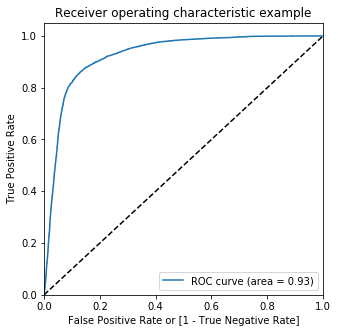

In [82]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.349776,0,1,1,1,1,0,0,0,0,0,0
1,0,0.000166,0,1,0,0,0,0,0,0,0,0,0
2,0,0.801592,1,1,1,1,1,1,1,1,1,1,0
3,0,0.000295,0,1,0,0,0,0,0,0,0,0,0
4,0,0.299720,0,1,1,1,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

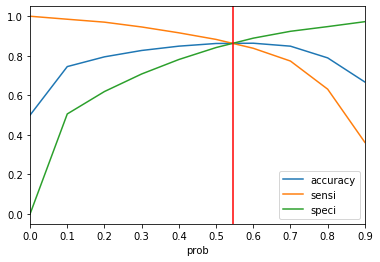

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.545,color='r')
plt.show()

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.545 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.349776,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.000166,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.801592,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.000295,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.299720,0,1,1,1,0,0,0,0,0,0,0,0


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8649965002333178

In [113]:
metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8645006999533364

### Precision Recall Curve

In [85]:
from sklearn.metrics import precision_recall_curve

In [87]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

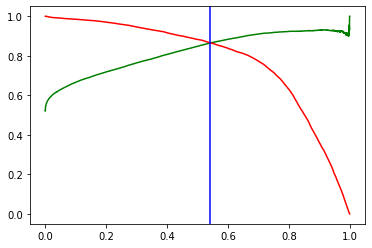

In [91]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.54,color='b')
plt.show()

Thus, our appropriate cutoff should be 0.54 which is similar to the one we chose in the accuracy,sensitivity and specificty cutoff.

### Evaluating on Test Set

In [114]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

#Creating a DataFrame of the original target variable and Purchase Probability 
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})

In [115]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.545 else 0)

In [116]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.8715958426522826

In [117]:
#roc_auc score
metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.8610742940995479

In [118]:
# Let's check the sensitivity.
metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.849802371541502

In [119]:
metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.18647007805724197

In [120]:
model_metrics=pd.DataFrame()

In [121]:
model_metrics.loc['Logistic Regression without PCA with sampling','Training Accuracy']=metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression without PCA with sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics.loc['Logistic Regression without PCA with sampling','Training Recall']=metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression without PCA with sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics.loc['Logistic Regression without PCA with sampling','Training Precision']=metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression without PCA with sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.18647


We observe that the metrics in the training set and the test set are almost same with a difference of maximum 2%. Hence, there is less chance of overfitting.

***Note:*** Even though the precision score is low, but the cost of False Positive is quite low. The most we will do is work on non-churn customers and provide them better schemes. We are treating our high value customers well in that case.
<br>
<br>
Moreover, as informed in the problem statement, ***retaining high profitable customers is the number one business goal***. Thus, it is more important to identify churners more than non churners accurately. Thus, the recall score or sensitivity should be high.
<br>
<br>
Because of the above mentioned reasons, we compensate on precision score to make a model which has a higher recall (sensitivity) score.

In [122]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34288
Model:                            GLM   Df Residuals:                    34275
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12059.
Date:                Mon, 27 Jan 2020   Deviance:                       24118.
Time:                        20:21:06   Pearson chi2:                 1.50e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7367      0.029    -25.297      0.000      -0.794      -0.680
onnet_mou_8           -0.4311      0.021    -20.309      0.000      -0.473      -0.390
roam_og_mou_8          1.0948      0.025     43.583      0.000       1.046       1.144
loc_og_t2m_mou_7      -0.4650      0.030    -15.489      0.000      -0.524      -0.406
loc_og_t2f_mou_8      -1.1501      0.076    -15.109      0.000      -1.299      -1.001
std_og_t2m_mou_8      -0.3543      0.021    -16.979      0.000      -0.395      -0.313
std_og_mou_7           0.5066      0.030     17.010      0.000       0.448       0.565
total_og_mou_6         0.2782      0.022     12.617      0.000       0.235       0.321
loc_ic_t2f_mou_8      -0.5243      0.057     -9.140      0.000      -0.637      -0.412
loc_ic_mou_8          -1.4107      0.055    -25.741      0.000      -1.518      -1.303
last_day_rch_amt_8    -0.5817      0.023    -24.805      0.000      -0.628      -0.536
aug_vbc_3g            -0.9824      0.049    -20.101      0.000      -1.078      -0.887
Recency_8              0.5437      0.019     28.695      0.000       0.507       0.581
======================================================================================
"""

The top 7 important variables affecting the churn are as follows:
- loc_ic_mou_8 (negatively related)
- loc_og_t2f_mou_8 (negatively related)
- roam_og_mou_8 (positively related)
- aug_vbc_3g (negatively related)
- last_day_rch_amt_8 (negatively related)
- Recency_8 (positively related)
- std_og_mou_7 (positively related)

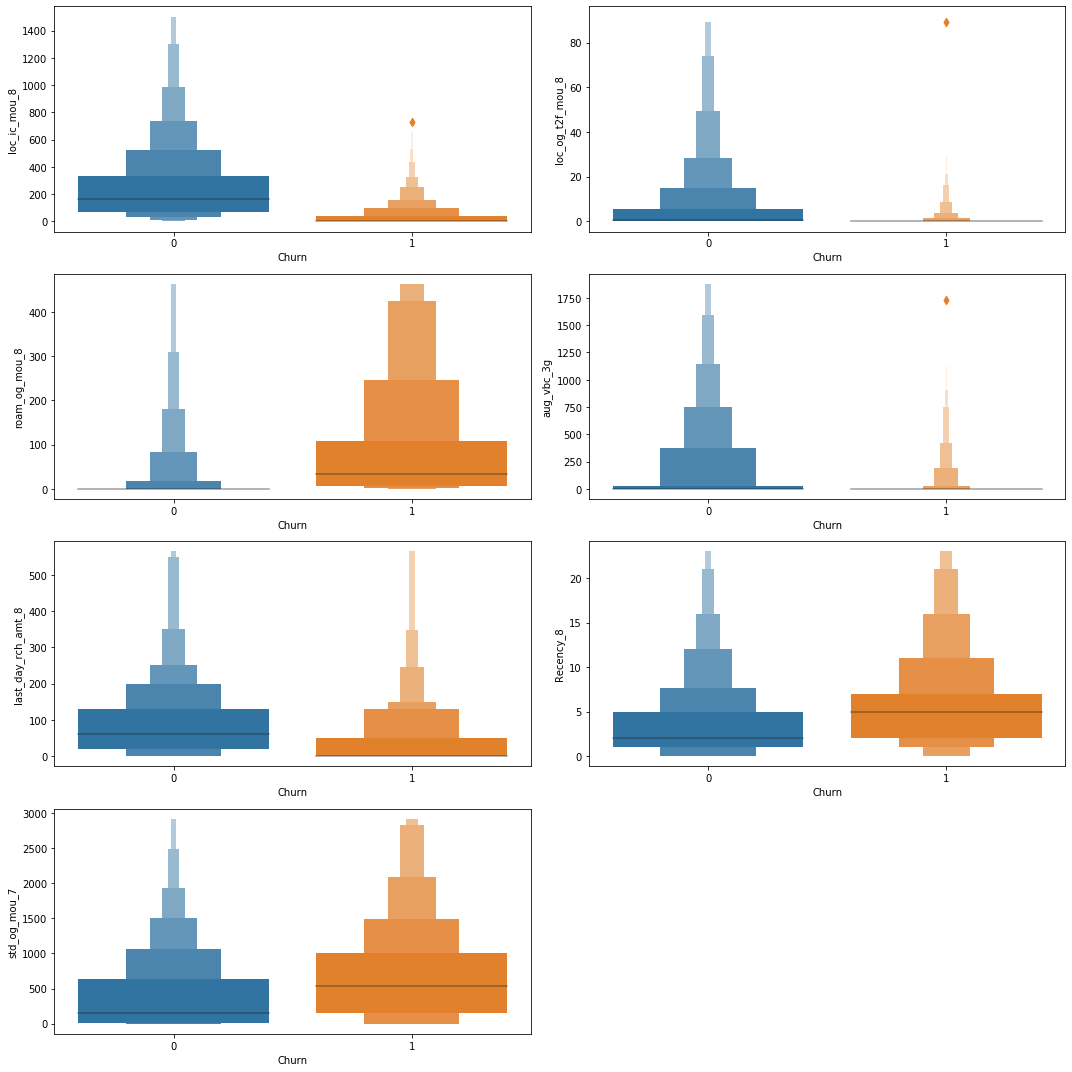

In [123]:
imp_col=['loc_ic_mou_8','loc_og_t2f_mou_8','roam_og_mou_8','aug_vbc_3g','last_day_rch_amt_8','Recency_8','std_og_mou_7']
i=1
plt.figure(figsize=(15,15))
for col in imp_col:
    plt.subplot(4,2,i)
    sns.boxenplot(y=fdf[col],x=fdf['Churn'])
    i+=1
plt.tight_layout()
plt.show()

- First four variables which are negatively correlated show higher probability of Churn for lower values.
- Last two variables which are positively correlated show higher probability of Churn for higher values.

Thus, we are able to visually verify the importance of features.

# Recommended Strategies

As mentioned above, the top 7 important variables affecting the churn are as follows:

- loc_ic_mou_8 (negatively related)
- loc_og_t2f_mou_8 (negatively related)
- roam_og_mou_8 (positively related)
- aug_vbc_3g (negatively related)
- last_day_rch_amt_8 (negatively related)
- Recency_8 (positively related)
- std_og_mou_7 (positively related)
<br>
<br>

**If the telecom company wants to retain high value customers, the company should provide special schemes or plans for customers in following call situations:**

- **Local Outgoing calls from Operator T to fixed lines of T (since loc_og_t2f_mou_8 is negatively related to churn, so as the minutes of usage in this case increase, the probability of retaining these customers increases)**
- **We also notice that as mintues of usage of roaming outgoing calls increase in August, the probability of Churn also increases and the customer is also not using special data plans in August since aug_vbc_3g also increases. This happened because possibly the customer has changed his location and needs a new sim card because of the location change. Thus, the company should have provisions to provide a new area connection on the same number or some special plans if a customer changes his/her location.**

*We now begin the model building with an aim to predict as better as possible. Note we want to maximize the recall (sensitivity) metric since we want to predict correctly the people who actually churn and the cost of false negatives is really high. If we predict a churning customer as not churn, then we have more chances to lose a high revenue customer.*

# Random Forest without PCA using class_weight='balanced' argument

In [125]:
# Importing required classes or libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Tuning max_depth

In [292]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   21.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   24.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   27.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [293]:
scores=pd.DataFrame(rf.cv_results_)

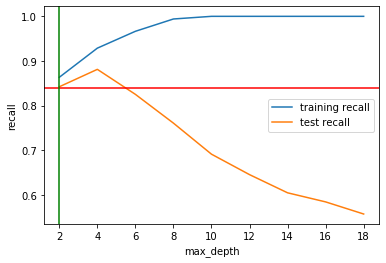

In [295]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.axhline(y=0.84,color='r')
plt.axvline(x=2,color='g')
plt.legend()
plt.show()

Optimal max_depth=2

### Tuning n_estimators

In [296]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    9.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   19.0s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   24.9s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   32.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [297]:
scores=pd.DataFrame(rf.cv_results_)

In [298]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

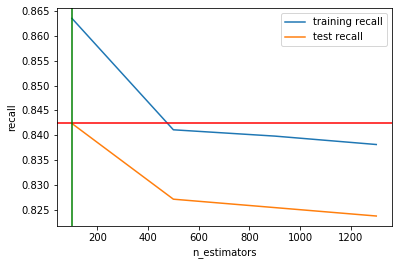

In [300]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.axhline(y=0.8425,color='r')
plt.axvline(x=100,color='g')
plt.legend()
plt.show()

Optimal n_estimators=100

### Tuning max_features

In [308]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(2, 26, 2)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   14.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [309]:
scores=pd.DataFrame(rf.cv_results_)

In [310]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

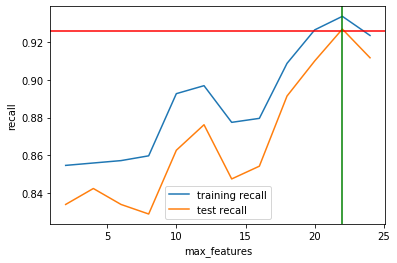

In [311]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.axhline(y=0.926,color='r')
plt.axvline(x=22,color='g')
plt.legend()
plt.show()

Optimal max_features=22

### Tuning min_samples_split

In [312]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100,500,50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [313]:
scores=pd.DataFrame(rf.cv_results_)

In [314]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

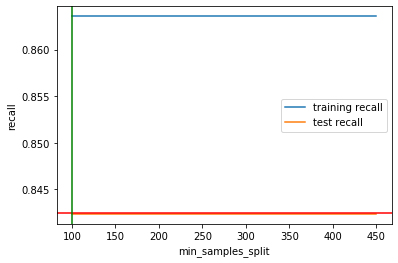

In [317]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.axhline(y=0.8425,color='r')
plt.axvline(x=100,color='g')
plt.legend()
plt.show()

Optimal min_samples_split=100

### Tuning min_samples_leaf

In [318]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100,500,50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [319]:
scores=pd.DataFrame(rf.cv_results_)

In [320]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=450, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

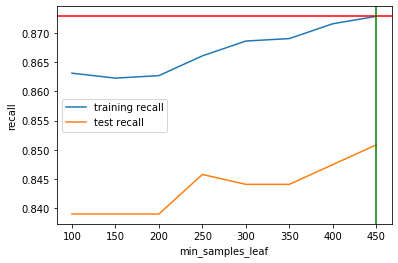

In [325]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.axhline(y=0.873,color='r')
plt.axvline(x=450,color='g')
plt.legend()
plt.show()

Optimal min_samples_leaf=450

### Hyperparameter Tuning using GridSearchCV

In [326]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [100,200,300,450],
    'min_samples_split': [100,200,300],
    'n_estimators': [100,200], 
    'max_features': [5,10,15,20,22]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced",random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='recall',
                          cv = 3, n_jobs = -1,verbose = 10)

In [327]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [328]:
# printing the optimal recall score and hyperparameters
print('We can get best recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best recall of 0.928769985151421 using {'max_depth': 4, 'max_features': 22, 'min_samples_leaf': 300, 'min_samples_split': 100, 'n_estimators': 200}


In [129]:
rf_nopca=RandomForestClassifier(max_depth=4,max_features=22,n_estimators=200,min_samples_split=100,min_samples_leaf=300,random_state=100,class_weight='balanced')
rf_nopca.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [130]:
#Training Set
print("Accuracy of Train "+str(metrics.accuracy_score(y_train,rf_nopca.predict(X_train))))
print("Recall of Train "+str(metrics.recall_score(y_train,rf_nopca.predict(X_train))))

#Test Set
print("Accuracy of Test "+str(metrics.accuracy_score(y_test,rf_nopca.predict(X_test))))
print("Recall of Test "+str(metrics.recall_score(y_test,rf_nopca.predict(X_test))))

Accuracy of Train 0.8949475583624675
Recall of Train 0.9542372881355933
Accuracy of Test 0.11248519931587948
Recall of Test 0.9881422924901185


In [131]:
model_metrics.loc['Random Forest without PCA without sampling','Training Accuracy']=metrics.accuracy_score(y_train,rf_nopca.predict(X_train))
model_metrics.loc['Random Forest without PCA without sampling','Test Accuracy']=metrics.accuracy_score(y_test,rf_nopca.predict(X_test))
model_metrics.loc['Random Forest without PCA without sampling','Training Recall']=metrics.recall_score(y_train,rf_nopca.predict(X_train))
model_metrics.loc['Random Forest without PCA without sampling','Test Recall']=metrics.recall_score(y_test,rf_nopca.predict(X_test))
model_metrics.loc['Random Forest without PCA without sampling','Training Precision']=metrics.precision_score(y_train,rf_nopca.predict(X_train))
model_metrics.loc['Random Forest without PCA without sampling','Test Precision']=metrics.precision_score(y_test,rf_nopca.predict(X_test))
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.18647
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.03575


We notice that the Test Accuracy decreases here. Thus, we cannot use this model.

# Dimensionality Reduction using PCA

In [132]:
#making a copy of the original dataframe
pcdf=fdf.copy()
pcdf.pop('Churn')

8        0
16       0
17       0
21       0
33       0
        ..
99965    0
99970    0
99974    0
99986    0
99988    0
Name: Churn, Length: 25335, dtype: int32

In [133]:
pcdf.shape

(25335, 129)

In [134]:
pcdf.info(verbose=3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 8 to 99988
Data columns (total 129 columns):
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8        

Thus, we observe that all the columns are numerical and we do not need to create dummy variables.

### Scaling the variables

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler=StandardScaler()
x=scaler.fit_transform(pcdf)

### Applying PCA on the dataset

In [137]:
#importing PCA function
from sklearn.decomposition import PCA

In [138]:
pca=PCA(random_state=50)

In [139]:
#fitting on pca
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot

In [140]:
var_cumsum=np.cumsum(pca.explained_variance_ratio_)

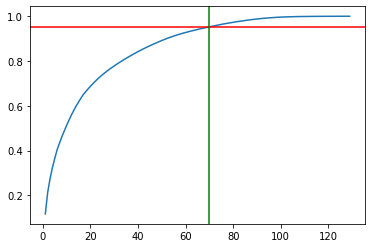

In [141]:
plt.plot(range(1,len(var_cumsum)+1), var_cumsum)
plt.axhline(y=0.95,color='r')
plt.axvline(x=70,color='g')

Thus, we are able to explain 95% variance with 70 columns. Thus, we reduced the dimensionality by 59 variables.

We obtain the new data after PCA with 70 components.

In [143]:
pca2=PCA(n_components=70,random_state=42)

In [144]:
md=pca2.fit_transform(x)

In [145]:
md.shape

(25335, 70)

In [146]:
col_names=[("PC"+"_"+str(i)) for i in range(1,71)]

In [147]:
#making a dataframe for convenience 
md=pd.DataFrame(md,columns=col_names)
md.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70
0,-3.302524,-2.047346,-0.792873,-1.463941,1.437729,0.429305,0.291593,0.039070,-0.344564,-0.477755,1.497306,0.583250,-0.501002,0.022636,-0.227516,-0.116628,1.361494,-0.067306,-0.714113,0.660802,-0.568835,-0.221683,0.723890,-0.365080,0.367657,-0.120647,0.326636,1.212525,0.096936,-0.626133,-0.267525,-0.758820,1.055533,-0.541310,0.597650,-0.294169,-0.324569,0.734055,0.102867,-0.387977,-0.517437,-0.289151,1.406778,-0.597128,-0.258430,0.203102,-0.614115,0.582464,0.250351,-0.151800,0.344645,0.355169,-0.289252,2.612237,-0.133919,-0.084890,0.016425,-0.662775,0.383637,0.045519,0.781561,-0.191357,-0.570332,0.185316,-0.254488,-0.184632,-0.277023,-0.364053,-0.082144,-0.146273
1,-0.782748,-2.534450,-0.861802,2.736280,-0.260174,0.423037,0.420540,-1.091213,1.057371,-0.078111,0.491298,-0.382676,-0.624343,-1.333879,0.591627,-0.161664,0.139258,0.330781,-0.886692,0.292967,-0.172457,0.947384,-0.280141,-0.212093,0.045714,-0.145981,0.209523,-0.004105,0.099894,0.614578,-0.518381,0.354663,0.255811,-0.608414,0.095193,-1.715515,0.241093,-1.310035,-0.143083,0.490977,0.714952,0.968182,0.539872,-0.415701,0.183875,0.286894,0.217710,-0.537288,0.836479,0.490919,-0.427198,-0.264927,-0.357435,-0.211409,-0.254766,-0.311702,0.765596,0.008569,-0.081272,0.692344,0.446406,-0.051950,0.351461,0.134506,0.132254,0.163996,0.753221,0.826014,0.613957,-0.908908
2,-5.052647,-1.940768,-1.578072,0.061570,-0.584338,1.460674,0.147229,-0.153382,2.752557,-2.179398,-0.140038,0.156622,-1.074593,0.223191,-0.344492,-0.088704,0.491057,0.097275,1.325039,-0.100042,-0.341067,-0.063430,-0.532083,-0.054955,-0.133498,-0.437718,-0.390968,0.489184,0.256840,0.108471,0.131282,0.424301,-0.045085,0.369237,-0.670030,-0.440074,-0.943911,-0.259794,1.103741,0.141470,0.145396,0.830468,0.694980,-0.067395,0.598033,1.162282,-1.073347,0.818620,0.865121,0.133283,0.018040,-0.359873,-0.167055,0.001217,0.026600,0.195374,0.492098,0.111935,0.011866,-0.353744,-0.276584,-0.324027,0.123418,0.151478,0.256939,0.264427,-0.098836,-0.061520,-0.424417,0.020047
3,-2.784637,2.900961,-0.823700,1.101149,0.701504,-3.230526,-0.275074,-1.170111,0.216613,1.202857,0.302535,-0.476057,-1.066236,0.943876,0.349864,-0.501896,1.481387,0.146149,0.485364,-0.059674,-0.352642,-0.357602,-0.345634,0.580044,0.356632,-0.168434,0.271265,-0.214971,-0.198324,0.318257,-0.111851,-0.644729,0.215988,0.200107,0.319363,-0.704563,-0.017269,0.259530,0.374380,-0.143889,-0.276478,0.010400,0.229743,0.105728,-0.046585,0.275464,-0.071035,0.076804,0.414334,-0.146727,0.009272,0.095331,0.464096,0.146666,0.164728,0.078629,-0.597471,-0.216833,0.005742,0.082375,-0.066439,0.378327,-0.208878,-0.188453,0.075635,-0.044944,0.248019,0.208884,0.088565,-0.017294
4,1.477498,-3.014318,12.834200,-7.785206,2.082295,0.680095,-1.048387,-2.383967,3.081192,0.781266,0.638335,-3.023950,-0.489423,1.031153,0.385071,0.186131,-1.020070,1.261522,-3.554594,0.150767,0.782603,-0.396112,-1.485565,-0.156879,0.655269,-0.202192,0.598208,-0.487277,-0.961132,-2.008463,-0.370932,-0.107970,0.871146,-0.064890,1.200858,-1.314702,0.189318,-2.082040,1.342594,1.336253,-0.582851,0.187623,-0.130036,-0.087401,-0.436013,-1.846490,-1.068223,1.712436,-1.313066,0.087369,0.923352,0.931984,-0.619932,1.574414,3.452214,0.260408,0.224318,-0.785947,-1.156028,-0.342211,0.272678,-0.494230,-0.921919,-1.177072,-0.593474,-1.816937,3.080137,-1.575720,0.745876,-0.067303


In [148]:
md['Churn']=fdf['Churn'].values
md.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,Churn
0,-3.302524,-2.047346,-0.792873,-1.463941,1.437729,0.429305,0.291593,0.039070,-0.344564,-0.477755,1.497306,0.583250,-0.501002,0.022636,-0.227516,-0.116628,1.361494,-0.067306,-0.714113,0.660802,-0.568835,-0.221683,0.723890,-0.365080,0.367657,-0.120647,0.326636,1.212525,0.096936,-0.626133,-0.267525,-0.758820,1.055533,-0.541310,0.597650,-0.294169,-0.324569,0.734055,0.102867,-0.387977,-0.517437,-0.289151,1.406778,-0.597128,-0.258430,0.203102,-0.614115,0.582464,0.250351,-0.151800,0.344645,0.355169,-0.289252,2.612237,-0.133919,-0.084890,0.016425,-0.662775,0.383637,0.045519,0.781561,-0.191357,-0.570332,0.185316,-0.254488,-0.184632,-0.277023,-0.364053,-0.082144,-0.146273,0
1,-0.782748,-2.534450,-0.861802,2.736280,-0.260174,0.423037,0.420540,-1.091213,1.057371,-0.078111,0.491298,-0.382676,-0.624343,-1.333879,0.591627,-0.161664,0.139258,0.330781,-0.886692,0.292967,-0.172457,0.947384,-0.280141,-0.212093,0.045714,-0.145981,0.209523,-0.004105,0.099894,0.614578,-0.518381,0.354663,0.255811,-0.608414,0.095193,-1.715515,0.241093,-1.310035,-0.143083,0.490977,0.714952,0.968182,0.539872,-0.415701,0.183875,0.286894,0.217710,-0.537288,0.836479,0.490919,-0.427198,-0.264927,-0.357435,-0.211409,-0.254766,-0.311702,0.765596,0.008569,-0.081272,0.692344,0.446406,-0.051950,0.351461,0.134506,0.132254,0.163996,0.753221,0.826014,0.613957,-0.908908,0
2,-5.052647,-1.940768,-1.578072,0.061570,-0.584338,1.460674,0.147229,-0.153382,2.752557,-2.179398,-0.140038,0.156622,-1.074593,0.223191,-0.344492,-0.088704,0.491057,0.097275,1.325039,-0.100042,-0.341067,-0.063430,-0.532083,-0.054955,-0.133498,-0.437718,-0.390968,0.489184,0.256840,0.108471,0.131282,0.424301,-0.045085,0.369237,-0.670030,-0.440074,-0.943911,-0.259794,1.103741,0.141470,0.145396,0.830468,0.694980,-0.067395,0.598033,1.162282,-1.073347,0.818620,0.865121,0.133283,0.018040,-0.359873,-0.167055,0.001217,0.026600,0.195374,0.492098,0.111935,0.011866,-0.353744,-0.276584,-0.324027,0.123418,0.151478,0.256939,0.264427,-0.098836,-0.061520,-0.424417,0.020047,0
3,-2.784637,2.900961,-0.823700,1.101149,0.701504,-3.230526,-0.275074,-1.170111,0.216613,1.202857,0.302535,-0.476057,-1.066236,0.943876,0.349864,-0.501896,1.481387,0.146149,0.485364,-0.059674,-0.352642,-0.357602,-0.345634,0.580044,0.356632,-0.168434,0.271265,-0.214971,-0.198324,0.318257,-0.111851,-0.644729,0.215988,0.200107,0.319363,-0.704563,-0.017269,0.259530,0.374380,-0.143889,-0.276478,0.010400,0.229743,0.105728,-0.046585,0.275464,-0.071035,0.076804,0.414334,-0.146727,0.009272,0.095331,0.464096,0.146666,0.164728,0.078629,-0.597471,-0.216833,0.005742,0.082375,-0.066439,0.378327,-0.208878,-0.188453,0.075635,-0.044944,0.248019,0.208884,0.088565,-0.017294,0
4,1.477498,-3.014318,12.834200,-7.785206,2.082295,0.680095,-1.048387,-2.383967,3.081192,0.781266,0.638335,-3.023950,-0.489423,1.031153,0.385071,0.186131,-1.020070,1.261522,-3.554594,0.150767,0.782603,-0.396112,-1.485565,-0.156879,0.655269,-0.202192,0.598208,-0.487277,-0.961132,-2.008463,-0.370932,-0.107970,0.871146,-0.064890,1.200858,-1.314702,0.189318,-2.082040,1.342594,1.336253,-0.582851,0.187623,-0.130036,-0.087401,-0.436013,-1.846490,-1.068223,1.712436,-1.313066,0.087369,0.923352,0.931984,-0.619932,1.574414,3.452214,0.260408,0.224318,-0.785947,-1.156028,-0.342211,0.272678,-0.494230,-0.921919,-1.177072,-0.593474,-1.816937,3.080137,-1.575720,0.745876,-0.067303,0


# Random Forest

In [149]:
#making a copy of the original dataframe
forest = md.copy()

In [150]:
forest.shape

(25335, 71)

### Data Preparation and Model Building (to be used for rest of the models as well)

In [151]:
# Putting feature variable to X
X = forest.drop('Churn',axis=1)

# Putting response variable to y
y = forest['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=101)


### SMOTEENN Analysis

In [152]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

In [216]:
# summarize class distribution
print(Counter(y_train))

# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5,random_state=100)

# fit and apply the transform
X_train_res, y_train_res = sample.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_res))

Counter({0: 17144, 1: 590})
Counter({0: 14322, 1: 8562})


### Hyperparameter tuning - Model Building without using any sampling technique but using class_weight='balanced' argument.

### Tuning max_depth

In [389]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=100) #we put class_weight='balanced' to deal with Data Imbalance present in the dataset


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   31.8s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   36.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   40.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   40.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [349]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [350]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

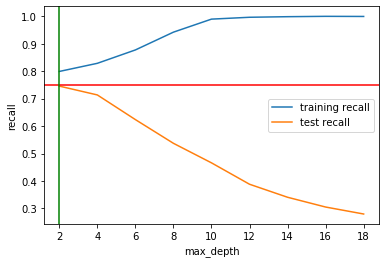

In [351]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.axhline(y=0.75,color='r')
plt.axvline(x=2,color='g')
plt.legend()
plt.show()

Thus we observe that the optimal max_depth parameter should be 2 since after 2, we start observing some overfitting and the recall score is around 75%.

### Tuning n_estimators

In [154]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   19.5s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   31.1s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   41.1s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   50.0s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   55.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   55.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [155]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [156]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

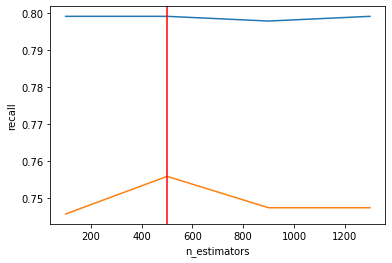

In [157]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.axvline(x=500,color='r')
plt.le
plt.show()


Thus, we observe that the highest test score is when n_estimators=500 with lesser overfitting.

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [361]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    5.7s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    8.1s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   11.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   12.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [362]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [363]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

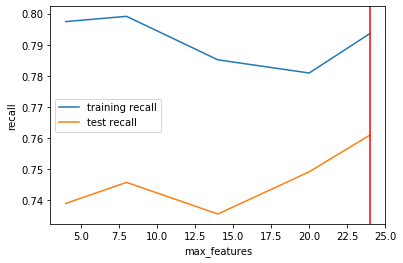

In [364]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.axvline(x=24,color='r')
plt.legend()
plt.show()


Hence, we observe the highest test score with minimal overfitting when max_features=24.

### Tuning min_samples_leaf

In [365]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   10.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   12.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [366]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [367]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

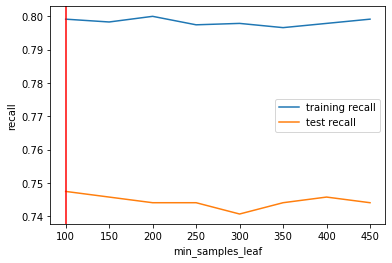

In [368]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.axvline(x=100,color='r')
plt.legend()
plt.show()

Thus, test score is maximum and less overfitting when min_samples_leaf=100

### Tuning min_samples_split

In [369]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=2,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   10.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   12.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                              

In [370]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [371]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

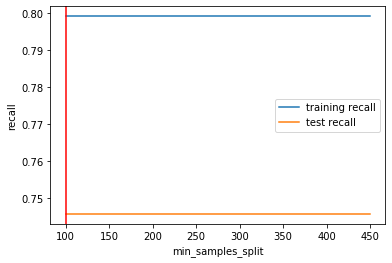

In [372]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.axvline(x=100,color='r')
plt.legend()
plt.show()

The optimal value of min_samples_split is 100.

## Grid Search to Find Optimal Hyperparameters

In [373]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [100,200,300],
    'min_samples_split': [100, 200, 300],
    'n_estimators': [100,300,500], 
    'max_features': [5,10,15,24]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced",random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='recall',
                          cv = 3, n_jobs = -1,verbose = 10)

In [374]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [375]:
# printing the optimal recall score and hyperparameters
print('We can get best recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best recall of 0.7661694119272076 using {'max_depth': 2, 'max_features': 24, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [158]:
rf_final=RandomForestClassifier(max_depth=2,max_features=24, min_samples_split=100,min_samples_leaf=100,n_estimators=100,class_weight="balanced")
rf_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [159]:
model_metrics.loc['Random Forest with PCA without Sampling','Training Accuracy']=metrics.accuracy_score(y_train,rf_final.predict(X_train))
model_metrics.loc['Random Forest with PCA without Sampling','Test Accuracy']=metrics.accuracy_score(y_test,rf_final.predict(X_test))
model_metrics.loc['Random Forest with PCA without Sampling','Training Recall']=metrics.recall_score(y_train,rf_final.predict(X_train))
model_metrics.loc['Random Forest with PCA without Sampling','Test Recall']=metrics.recall_score(y_test,rf_final.predict(X_test))
model_metrics.loc['Random Forest with PCA without Sampling','Training Precision']=metrics.precision_score(y_train,rf_final.predict(X_train))
model_metrics.loc['Random Forest with PCA without Sampling','Test Precision']=metrics.precision_score(y_test,rf_final.predict(X_test))

In [160]:
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047


### Hyperparameter tuning - Model Building using SMOTEENN (Combined) Sampling Technique

### Tuning max_depth

In [400]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   50.7s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   59.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [401]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

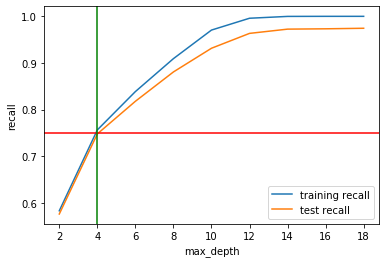

In [402]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.axhline(y=0.75,color='r')
plt.axvline(x=4,color='g')
plt.legend()
plt.show()

The optimal max_depth=4.

### Tuning n_estimators

In [403]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   29.7s remaining:   44.6s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  1.0min remaining:   49.1s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  1.4min remaining:   35.8s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  1.8min remaining:   18.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [404]:
scores=pd.DataFrame(rf.cv_results_)

In [406]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

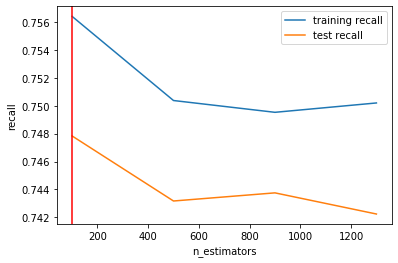

In [407]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.axvline(x=100,color='r')
plt.legend()
plt.show()


Optimal n_estimators=100 to compensate with the computational cost.

### Tuning max_features

In [408]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(2,24,2)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  46 out of  55 | elapsed:   50.7s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  52 out of  55 | elapsed:  1.0min remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [409]:
scores=pd.DataFrame(rf.cv_results_)

In [411]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

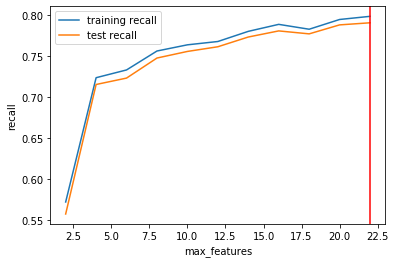

In [412]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.axvline(x=22,color='r')
plt.legend()
plt.show()


Optimal max_features=22

### GridSearch to find optimal hyperparameters

In [413]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [100,200,300],
    'min_samples_split': [100, 200,300],
    'n_estimators': [100,200], 
    'max_features': [5,10,15,22]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the grid search model
grid_search_sam = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='recall',
                          cv = 3, n_jobs = -1,verbose = 10)

In [414]:
grid_search_sam.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [415]:
# printing the optimal recall score and hyperparameters
print('We can get best recall of',grid_search_sam.best_score_,'using',grid_search_sam.best_params_)

We can get best recall of 0.7862648913805185 using {'max_depth': 4, 'max_features': 22, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [171]:
rf_sam_final=RandomForestClassifier(max_depth=4,max_features=22,min_samples_leaf=100,min_samples_split=100,n_estimators=100,random_state=100)
rf_sam_final.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [172]:
model_metrics.loc['Random Forest with PCA with Sampling','Training Accuracy']=metrics.accuracy_score(y_train_res,rf_sam_final.predict(X_train_res))
model_metrics.loc['Random Forest with PCA with Sampling','Test Accuracy']=metrics.accuracy_score(y_test,rf_sam_final.predict(X_test))
model_metrics.loc['Random Forest with PCA with Sampling','Training Recall']=metrics.recall_score(y_train_res,rf_sam_final.predict(X_train_res))
model_metrics.loc['Random Forest with PCA with Sampling','Test Recall']=metrics.recall_score(y_test,rf_sam_final.predict(X_test))
model_metrics.loc['Random Forest with PCA with Sampling','Training Precision']=metrics.precision_score(y_train_res,rf_sam_final.predict(X_train_res))
model_metrics.loc['Random Forest with PCA with Sampling','Test Precision']=metrics.precision_score(y_test,rf_sam_final.predict(X_test))

In [173]:
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1.000000,0.438735,0.669694,0.290576
AdaBoost with PCA with sampling,0.968366,0.938034,1.000000,0.513834,0.512598,0.271967
Random Forest with PCA with Sampling,0.899624,0.897908,0.796076,0.715415,0.925207,0.204520


# Adaptive Boosting (AdaBoost)

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

### Hyperparamter tuning without using any Sampling Technique but using class_weight='balanced'

#### min_samples_split and max_depth

In [420]:
# parameter grid
param_grid = {"base_estimator__min_samples_split" : [100,200,300],
              "base_estimator__max_depth":[2,3,5]
             }


# base estimator
tree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=300)

# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 10,n_jobs=-1)

# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:  3.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  5.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:  6.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  6.8min remaining:   50.8s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  8.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  8.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_lea

In [421]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)

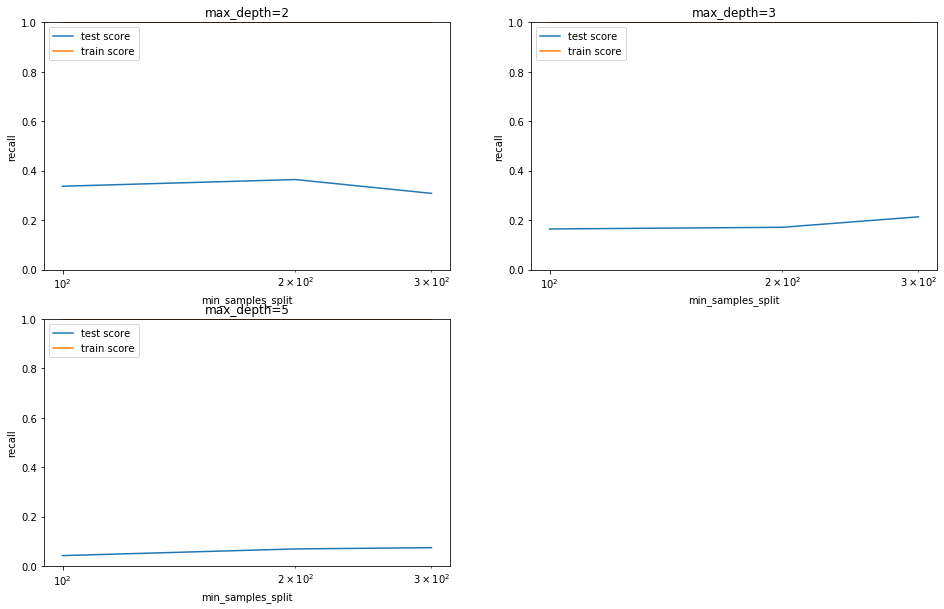

In [422]:
# plotting recall with hyperparameter combinations

plt.figure(figsize=(16,10))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(2,2, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_base_estimator__min_samples_split"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_base_estimator__min_samples_split"], depth_df["mean_train_score"])
    plt.xlabel('min_samples_split')
    plt.ylabel('recall')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [423]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search_ABC.best_score_,'using',grid_search_ABC.best_params_)

We can get recall of 0.36438585586518873 using {'base_estimator__max_depth': 2, 'base_estimator__min_samples_split': 200}


In [164]:
#instantiating the decision tree
f_tree=DecisionTreeClassifier(max_depth=2,min_samples_split=200,class_weight='balanced',random_state=100)

abc_final=AdaBoostClassifier(base_estimator=f_tree,learning_rate=0.6,
                            n_estimators=300,random_state=100)
abc_final.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=200,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [165]:
model_metrics.loc['AdaBoost with PCA without sampling','Training Accuracy']=metrics.accuracy_score(y_train,abc_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA without sampling','Test Accuracy']=metrics.accuracy_score(y_test,abc_final.predict(X_test))
model_metrics.loc['AdaBoost with PCA without sampling','Training Recall']=metrics.recall_score(y_train,abc_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA without sampling','Test Recall']=metrics.recall_score(y_test,abc_final.predict(X_test))
model_metrics.loc['AdaBoost with PCA without sampling','Training Precision']=metrics.precision_score(y_train,abc_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA without sampling','Test Precision']=metrics.precision_score(y_test,abc_final.predict(X_test))

In [166]:
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1.000000,0.438735,0.669694,0.290576


### Hyperparamter tuning using SMOTEENN (Combined) Sampling Technique

In [432]:
# parameter grid
param_grid = {"base_estimator__min_samples_split" : [100,200,300],
              "base_estimator__max_depth":[2,3,5]
             }


# base estimator
tree = DecisionTreeClassifier(random_state=100)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200)

# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 10,n_jobs=-1)

# fit 
grid_search_ABC.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:  3.1min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  4.8min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:  5.9min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  5.9min remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [433]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)

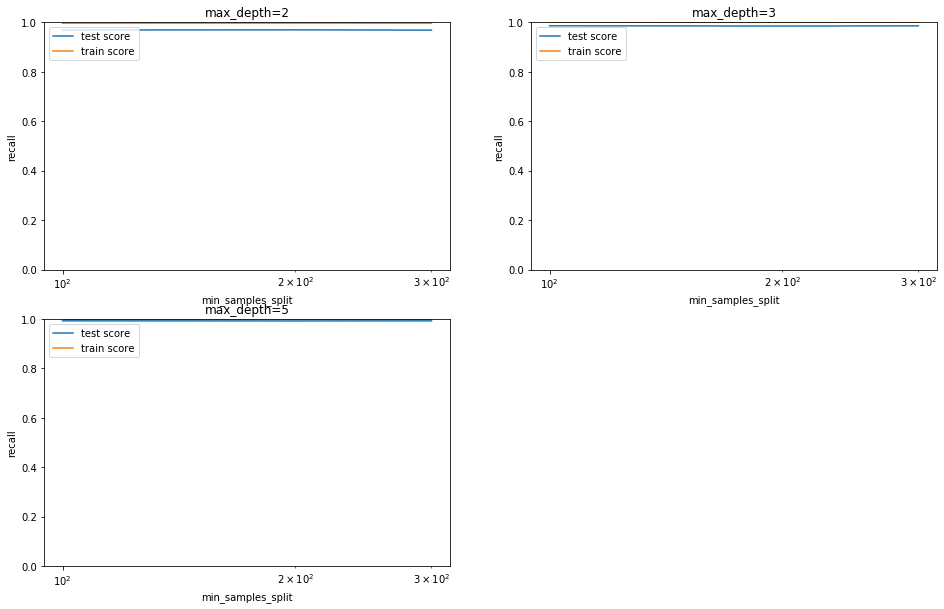

In [434]:
# plotting recall with hyperparameter combinations

plt.figure(figsize=(16,10))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(2,2, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_base_estimator__min_samples_split"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_base_estimator__min_samples_split"], depth_df["mean_train_score"])
    plt.xlabel('min_samples_split')
    plt.ylabel('recall')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [436]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search_ABC.best_score_,'using',grid_search_ABC.best_params_)

We can get recall of 0.9926419060967064 using {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 100}


In [168]:
#instantiating the decision tree
f_sam_tree=DecisionTreeClassifier(max_depth=5,min_samples_split=100,random_state=100)

abc_sam_final=AdaBoostClassifier(base_estimator=f_tree,learning_rate=0.6,
                            n_estimators=200,random_state=100)
abc_sam_final.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=200,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [169]:
model_metrics.loc['AdaBoost with PCA with sampling','Training Accuracy']=metrics.accuracy_score(y_train,abc_sam_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA with sampling','Test Accuracy']=metrics.accuracy_score(y_test,abc_sam_final.predict(X_test))
model_metrics.loc['AdaBoost with PCA with sampling','Training Recall']=metrics.recall_score(y_train,abc_sam_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA with sampling','Test Recall']=metrics.recall_score(y_test,abc_sam_final.predict(X_test))
model_metrics.loc['AdaBoost with PCA with sampling','Training Precision']=metrics.precision_score(y_train,abc_sam_final.predict(X_train))
model_metrics.loc['AdaBoost with PCA with sampling','Test Precision']=metrics.precision_score(y_test,abc_sam_final.predict(X_test))

In [170]:
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1.000000,0.438735,0.669694,0.290576
AdaBoost with PCA with sampling,0.968366,0.938034,1.000000,0.513834,0.512598,0.271967


We notice a general overfitting in with sampling cases after PCA. Thus, we use only class_weight='balanced' argument for XGBoosting

# XGBoost

In [174]:
import xgboost as xgb

In [175]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [442]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.6, 0.9],
             'max_depth':[2,3,4,5],
             'n_estimators':[200,300]}          


# specify model
xgb_model = XGBClassifier(class_weight='balanced',random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 10,n_jobs=-1,
                        return_train_score=True) 

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  91 out of  96 | elapsed:  5.0min remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [2, 3, 4, 5

In [443]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',model_cv.best_score_,'using',model_cv.best_params_)

We can get recall of 0.21346558928139783 using {'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}


In [176]:
xgbf=XGBClassifier(learning_rate=0.6,max_depth=2,n_estimators=200,subsample=0.6,class_weight='balanced',random_state=100)
xgbf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [177]:
model_metrics.loc['XGBoost with PCA','Training Accuracy']=metrics.accuracy_score(y_train,xgbf.predict(X_train))
model_metrics.loc['XGBoost with PCA','Test Accuracy']=metrics.accuracy_score(y_test,xgbf.predict(X_test))
model_metrics.loc['XGBoost with PCA','Training Recall']=metrics.recall_score(y_train,xgbf.predict(X_train))
model_metrics.loc['XGBoost with PCA','Test Recall']=metrics.recall_score(y_test,xgbf.predict(X_test))
model_metrics.loc['XGBoost with PCA','Training Precision']=metrics.precision_score(y_train,xgbf.predict(X_train))
model_metrics.loc['XGBoost with PCA','Test Precision']=metrics.precision_score(y_test,xgbf.predict(X_test))

In [178]:
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1.000000,0.438735,0.669694,0.290576
AdaBoost with PCA with sampling,0.968366,0.938034,1.000000,0.513834,0.512598,0.271967
Random Forest with PCA with Sampling,0.899624,0.897908,0.796076,0.715415,0.925207,0.204520
XGBoost with PCA,0.991485,0.962110,0.783051,0.292490,0.952577,0.404372


# PCA+SMOTEENN+LOGISTIC REGRESSION MODEL

In [205]:
vif(list(X_train_res.columns))

,Features,VIF
6,PC_7,1.18
8,PC_9,1.18
9,PC_10,1.15
0,PC_1,1.12
18,PC_19,1.11
5,PC_6,1.09
45,PC_46,1.09
38,PC_39,1.08
46,PC_47,1.07
10,PC_11,1.07


We notice that VIF value of all the Principal components is below 5. Hence, we do not need to check VIF values while model building because PCA reduces the Multicollinearity while decreasing the dimensionality.

In [217]:
# Instantiate Logistic Regression
logreg2 = LogisticRegression()

rfe = RFE(logreg2, 50)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_res, y_train_res)

In [218]:
col = X_train_res.columns[rfe.support_]
col

Index(['PC_1', 'PC_2', 'PC_4', 'PC_5', 'PC_7', 'PC_8', 'PC_9', 'PC_10',
       'PC_14', 'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20', 'PC_21', 'PC_22',
       'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_28', 'PC_29', 'PC_31', 'PC_32',
       'PC_33', 'PC_34', 'PC_35', 'PC_38', 'PC_39', 'PC_40', 'PC_41', 'PC_42',
       'PC_44', 'PC_45', 'PC_46', 'PC_48', 'PC_50', 'PC_51', 'PC_52', 'PC_53',
       'PC_54', 'PC_56', 'PC_58', 'PC_60', 'PC_61', 'PC_63', 'PC_64', 'PC_66',
       'PC_69', 'PC_70'],
      dtype='object')

### Model 1

In [219]:
X_train_sm = sm.add_constant(X_train_res[col])
logm1 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22833
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5029.2
Date:                Mon, 27 Jan 2020   Deviance:                       10058.
Time:                        21:07:53   Pearson chi2:                 1.19e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9321      0.072    -54.555      0.000      -4.073      -3.791
PC_1          -0.9014      0.019    -48.243      0.000      -0.938      -0.865
PC_2           0.1384      0.009     15.882      0.000       0.121       0.156
PC_4           0.1629      0.017      9.622      0.000       0.130       0.196
PC_5          -0.2089      0.018    -11.388      0.000      -0.245      -0.173
PC_7           0.6714      0.021     32.233      0.000       0.631       0.712
PC_8          -0.0870      0.024     -3.642      0.000      -0.134      -0.040
PC_9           0.6192      0.024     25.474      0.000       0.572       0.667
PC_10         -0.3744      0.023    -16.306      0.000      -0.419      -0.329
PC_14          0.1797      0.026      6.876      0.000       0.128       0.231
PC_16         -0.1587      0.034     -4.727      0.000      -0.225      -0.093
PC_17         -0.1520      0.031     -4.956      0.000      -0.212      -0.092
PC_18          0.3320      0.026     12.706      0.000       0.281       0.383
PC_19         -0.7782      0.026    -30.481      0.000      -0.828      -0.728
PC_20          0.4287      0.037     11.446      0.000       0.355       0.502
PC_21         -0.1020      0.038     -2.702      0.007      -0.176      -0.028
PC_22         -0.1283      0.026     -4.885      0.000      -0.180      -0.077
PC_23          0.3115      0.036      8.596      0.000       0.240       0.383
PC_24          0.2492      0.033      7.598      0.000       0.185       0.314
PC_25         -0.1985      0.037     -5.405      0.000      -0.271      -0.127
PC_26         -0.1858      0.040     -4.608      0.000      -0.265      -0.107
PC_28         -0.0995      0.031     -3.244      0.001      -0.160      -0.039
PC_29         -0.4275      0.044     -9.716      0.000      -0.514      -0.341
PC_31         -0.4871      0.041    -11.836      0.000      -0.568      -0.406
PC_32         -0.1170      0.050     -2.350      0.019      -0.215      -0.019
PC_33          0.1368      0.034      4.014      0.000       0.070       0.204
PC_34         -0.3561      0.037     -9.667      0.000      -0.428      -0.284
PC_35          0.1508      0.041      3.682      0.000       0.071       0.231
PC_38         -0.1288      0.036     -3.614      0.000      -0.199      -0.059
PC_39          0.1072      0.042      2.534      0.011       0.024       0.190
PC_40         -0.3564      0.036     -9.937      0.000      -0.427      -0.286
PC_41         -0.1896      0.044     -4.301      0.000      -0.276      -0.103
PC_42         -0.1012      0.041     -2.462      0.014      -0.182      -0.021
PC_44          0.2331      0.053      4.422      0.000       0.130       0.336
PC_45          0.1069      0.042      2.567      0.010       0.025       0.189
PC_46          0.1372      0.043      3.202      0.001       0.053       0.221
PC

Dropping PC_63 due to high p value equal to 0.194

In [220]:
col=col.drop('PC_63')

### Model 2

In [221]:
X_train_sm = sm.add_constant(X_train_res[col])
logm2 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22834
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5030.0
Date:                Mon, 27 Jan 2020   Deviance:                       10060.
Time:                        21:08:34   Pearson chi2:                 1.34e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9269      0.072    -54.634      0.000      -4.068      -3.786
PC_1          -0.8996      0.019    -48.328      0.000      -0.936      -0.863
PC_2           0.1381      0.009     15.852      0.000       0.121       0.155
PC_4           0.1656      0.017      9.873      0.000       0.133       0.198
PC_5          -0.2104      0.018    -11.497      0.000      -0.246      -0.175
PC_7           0.6686      0.021     32.352      0.000       0.628       0.709
PC_8          -0.0832      0.024     -3.522      0.000      -0.129      -0.037
PC_9           0.6160      0.024     25.595      0.000       0.569       0.663
PC_10         -0.3768      0.023    -16.548      0.000      -0.421      -0.332
PC_14          0.1832      0.026      7.068      0.000       0.132       0.234
PC_16         -0.1592      0.034     -4.750      0.000      -0.225      -0.093
PC_17         -0.1527      0.031     -4.982      0.000      -0.213      -0.093
PC_18          0.3307      0.026     12.680      0.000       0.280       0.382
PC_19         -0.7781      0.026    -30.506      0.000      -0.828      -0.728
PC_20          0.4304      0.037     11.524      0.000       0.357       0.504
PC_21         -0.1003      0.038     -2.666      0.008      -0.174      -0.027
PC_22         -0.1271      0.026     -4.838      0.000      -0.179      -0.076
PC_23          0.3045      0.036      8.508      0.000       0.234       0.375
PC_24          0.2531      0.033      7.758      0.000       0.189       0.317
PC_25         -0.1999      0.037     -5.451      0.000      -0.272      -0.128
PC_26         -0.1843      0.040     -4.579      0.000      -0.263      -0.105
PC_28         -0.0996      0.031     -3.247      0.001      -0.160      -0.039
PC_29         -0.4236      0.044     -9.654      0.000      -0.510      -0.338
PC_31         -0.4872      0.041    -11.842      0.000      -0.568      -0.407
PC_32         -0.1176      0.050     -2.362      0.018      -0.215      -0.020
PC_33          0.1382      0.034      4.060      0.000       0.071       0.205
PC_34         -0.3552      0.037     -9.650      0.000      -0.427      -0.283
PC_35          0.1527      0.041      3.733      0.000       0.073       0.233
PC_38         -0.1275      0.036     -3.578      0.000      -0.197      -0.058
PC_39          0.1091      0.042      2.581      0.010       0.026       0.192
PC_40         -0.3564      0.036     -9.936      0.000      -0.427      -0.286
PC_41         -0.1882      0.044     -4.271      0.000      -0.275      -0.102
PC_42         -0.1001      0.041     -2.437      0.015      -0.181      -0.020
PC_44          0.2357      0.053      4.472      0.000       0.132       0.339
PC_45          0.1079      0.042      2.591      0.010       0.026       0.189
PC_46          0.1348      0.043      3.151      0.002       0.051       0.219
PC

Dropping PC_70 due to high p value equal to 0.127

In [222]:
col=col.drop('PC_70')

### Model 3

In [223]:
X_train_sm = sm.add_constant(X_train_res[col])
logm3 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22835
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5031.2
Date:                Mon, 27 Jan 2020   Deviance:                       10062.
Time:                        21:09:11   Pearson chi2:                 1.25e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9180      0.071    -54.825      0.000      -4.058      -3.778
PC_1          -0.8977      0.019    -48.418      0.000      -0.934      -0.861
PC_2           0.1376      0.009     15.820      0.000       0.121       0.155
PC_4           0.1648      0.017      9.824      0.000       0.132       0.198
PC_5          -0.2127      0.018    -11.642      0.000      -0.248      -0.177
PC_7           0.6665      0.021     32.295      0.000       0.626       0.707
PC_8          -0.0822      0.024     -3.477      0.001      -0.128      -0.036
PC_9           0.6114      0.024     25.590      0.000       0.565       0.658
PC_10         -0.3775      0.023    -16.524      0.000      -0.422      -0.333
PC_14          0.1808      0.026      6.983      0.000       0.130       0.232
PC_16         -0.1540      0.033     -4.616      0.000      -0.219      -0.089
PC_17         -0.1491      0.031     -4.876      0.000      -0.209      -0.089
PC_18          0.3301      0.026     12.659      0.000       0.279       0.381
PC_19         -0.7771      0.026    -30.452      0.000      -0.827      -0.727
PC_20          0.4345      0.037     11.649      0.000       0.361       0.508
PC_21         -0.0967      0.038     -2.576      0.010      -0.170      -0.023
PC_22         -0.1276      0.026     -4.857      0.000      -0.179      -0.076
PC_23          0.3035      0.036      8.480      0.000       0.233       0.374
PC_24          0.2537      0.033      7.779      0.000       0.190       0.318
PC_25         -0.1983      0.037     -5.409      0.000      -0.270      -0.126
PC_26         -0.1863      0.040     -4.630      0.000      -0.265      -0.107
PC_28         -0.1006      0.031     -3.275      0.001      -0.161      -0.040
PC_29         -0.4217      0.044     -9.611      0.000      -0.508      -0.336
PC_31         -0.4882      0.041    -11.865      0.000      -0.569      -0.408
PC_32         -0.1153      0.050     -2.320      0.020      -0.213      -0.018
PC_33          0.1382      0.034      4.057      0.000       0.071       0.205
PC_34         -0.3538      0.037     -9.615      0.000      -0.426      -0.282
PC_35          0.1487      0.041      3.647      0.000       0.069       0.229
PC_38         -0.1269      0.036     -3.564      0.000      -0.197      -0.057
PC_39          0.1129      0.042      2.677      0.007       0.030       0.196
PC_40         -0.3542      0.036     -9.885      0.000      -0.424      -0.284
PC_41         -0.1910      0.044     -4.339      0.000      -0.277      -0.105
PC_42         -0.0960      0.041     -2.337      0.019      -0.176      -0.015
PC_44          0.2322      0.053      4.418      0.000       0.129       0.335
PC_45          0.1089      0.042      2.614      0.009       0.027       0.191
PC_46          0.1354      0.043      3.166      0.002       0.052       0.219
PC

Dropping PC_56 due to high p value equal to 0.057

In [224]:
col=col.drop('PC_56')

### Model 4

In [225]:
X_train_sm = sm.add_constant(X_train_res[col])
logm4 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22836
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5033.0
Date:                Mon, 27 Jan 2020   Deviance:                       10066.
Time:                        21:10:05   Pearson chi2:                 1.22e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9125      0.071    -54.936      0.000      -4.052      -3.773
PC_1          -0.8962      0.018    -48.512      0.000      -0.932      -0.860
PC_2           0.1366      0.009     15.750      0.000       0.120       0.154
PC_4           0.1677      0.017     10.096      0.000       0.135       0.200
PC_5          -0.2130      0.018    -11.677      0.000      -0.249      -0.177
PC_7           0.6619      0.020     32.430      0.000       0.622       0.702
PC_8          -0.0809      0.024     -3.430      0.001      -0.127      -0.035
PC_9           0.6070      0.024     25.701      0.000       0.561       0.653
PC_10         -0.3810      0.023    -16.838      0.000      -0.425      -0.337
PC_14          0.1883      0.025      7.404      0.000       0.138       0.238
PC_16         -0.1539      0.033     -4.622      0.000      -0.219      -0.089
PC_17         -0.1429      0.030     -4.709      0.000      -0.202      -0.083
PC_18          0.3321      0.026     12.761      0.000       0.281       0.383
PC_19         -0.7739      0.025    -30.434      0.000      -0.824      -0.724
PC_20          0.4404      0.037     11.928      0.000       0.368       0.513
PC_21         -0.0929      0.037     -2.487      0.013      -0.166      -0.020
PC_22         -0.1279      0.026     -4.871      0.000      -0.179      -0.076
PC_23          0.3008      0.036      8.415      0.000       0.231       0.371
PC_24          0.2520      0.033      7.743      0.000       0.188       0.316
PC_25         -0.1944      0.036     -5.338      0.000      -0.266      -0.123
PC_26         -0.1824      0.040     -4.550      0.000      -0.261      -0.104
PC_28         -0.0997      0.031     -3.249      0.001      -0.160      -0.040
PC_29         -0.4197      0.044     -9.576      0.000      -0.506      -0.334
PC_31         -0.4866      0.041    -11.836      0.000      -0.567      -0.406
PC_32         -0.1101      0.050     -2.221      0.026      -0.207      -0.013
PC_33          0.1386      0.034      4.071      0.000       0.072       0.205
PC_34         -0.3528      0.037     -9.591      0.000      -0.425      -0.281
PC_35          0.1490      0.041      3.652      0.000       0.069       0.229
PC_38         -0.1254      0.036     -3.522      0.000      -0.195      -0.056
PC_39          0.1184      0.042      2.823      0.005       0.036       0.201
PC_40         -0.3560      0.036     -9.938      0.000      -0.426      -0.286
PC_41         -0.1842      0.044     -4.204      0.000      -0.270      -0.098
PC_42         -0.0951      0.041     -2.322      0.020      -0.175      -0.015
PC_44          0.2346      0.052      4.476      0.000       0.132       0.337
PC_45          0.1080      0.042      2.594      0.009       0.026       0.190
PC_46          0.1373      0.043      3.214      0.001       0.054       0.221
PC

Dropping PC_51 due to high p value equal to 0.061

In [226]:
col=col.drop('PC_51')

### Model 5

In [227]:
X_train_sm = sm.add_constant(X_train_res[col])
logm5 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22837
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5034.8
Date:                Mon, 27 Jan 2020   Deviance:                       10070.
Time:                        21:11:06   Pearson chi2:                 1.43e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9087      0.071    -54.942      0.000      -4.048      -3.769
PC_1          -0.8960      0.018    -48.526      0.000      -0.932      -0.860
PC_2           0.1364      0.009     15.711      0.000       0.119       0.153
PC_4           0.1686      0.017     10.167      0.000       0.136       0.201
PC_5          -0.2111      0.018    -11.618      0.000      -0.247      -0.176
PC_7           0.6617      0.020     32.488      0.000       0.622       0.702
PC_8          -0.0786      0.024     -3.341      0.001      -0.125      -0.032
PC_9           0.6066      0.024     25.697      0.000       0.560       0.653
PC_10         -0.3799      0.023    -16.791      0.000      -0.424      -0.336
PC_14          0.1901      0.025      7.475      0.000       0.140       0.240
PC_16         -0.1473      0.033     -4.481      0.000      -0.212      -0.083
PC_17         -0.1440      0.030     -4.750      0.000      -0.203      -0.085
PC_18          0.3286      0.026     12.710      0.000       0.278       0.379
PC_19         -0.7727      0.025    -30.407      0.000      -0.822      -0.723
PC_20          0.4388      0.037     11.911      0.000       0.367       0.511
PC_21         -0.0859      0.037     -2.323      0.020      -0.158      -0.013
PC_22         -0.1273      0.026     -4.845      0.000      -0.179      -0.076
PC_23          0.3018      0.036      8.441      0.000       0.232       0.372
PC_24          0.2505      0.032      7.714      0.000       0.187       0.314
PC_25         -0.1931      0.036     -5.311      0.000      -0.264      -0.122
PC_26         -0.1899      0.040     -4.794      0.000      -0.268      -0.112
PC_28         -0.1005      0.031     -3.272      0.001      -0.161      -0.040
PC_29         -0.4200      0.044     -9.586      0.000      -0.506      -0.334
PC_31         -0.4895      0.041    -11.919      0.000      -0.570      -0.409
PC_32         -0.1093      0.050     -2.204      0.028      -0.207      -0.012
PC_33          0.1416      0.034      4.168      0.000       0.075       0.208
PC_34         -0.3487      0.037     -9.490      0.000      -0.421      -0.277
PC_35          0.1503      0.041      3.689      0.000       0.070       0.230
PC_38         -0.1218      0.036     -3.429      0.001      -0.191      -0.052
PC_39          0.1227      0.042      2.929      0.003       0.041       0.205
PC_40         -0.3581      0.036    -10.001      0.000      -0.428      -0.288
PC_41         -0.1809      0.044     -4.137      0.000      -0.267      -0.095
PC_42         -0.1022      0.041     -2.511      0.012      -0.182      -0.022
PC_44          0.2172      0.050      4.315      0.000       0.119       0.316
PC_45          0.1037      0.041      2.501      0.012       0.022       0.185
PC_46          0.1425      0.043      3.352      0.001       0.059       0.226
PC

Dropping PC_54 due to high p value equal to 0.047 (approximately equal to 0.5)

In [228]:
col=col.drop('PC_54')

### Model 6

In [230]:
X_train_sm = sm.add_constant(X_train_res[col])
logm6 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                22884
Model:                            GLM   Df Residuals:                    22838
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5036.8
Date:                Mon, 27 Jan 2020   Deviance:                       10074.
Time:                        21:12:18   Pearson chi2:                 1.48e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9015      0.071    -55.043      0.000      -4.040      -3.763
PC_1          -0.8944      0.018    -48.568      0.000      -0.930      -0.858
PC_2           0.1353      0.009     15.636      0.000       0.118       0.152
PC_4           0.1661      0.017     10.047      0.000       0.134       0.199
PC_5          -0.2095      0.018    -11.545      0.000      -0.245      -0.174
PC_7           0.6606      0.020     32.499      0.000       0.621       0.700
PC_8          -0.0803      0.024     -3.410      0.001      -0.126      -0.034
PC_9           0.6063      0.024     25.708      0.000       0.560       0.652
PC_10         -0.3807      0.023    -16.865      0.000      -0.425      -0.336
PC_14          0.1890      0.025      7.440      0.000       0.139       0.239
PC_16         -0.1455      0.033     -4.427      0.000      -0.210      -0.081
PC_17         -0.1392      0.030     -4.612      0.000      -0.198      -0.080
PC_18          0.3318      0.026     12.866      0.000       0.281       0.382
PC_19         -0.7694      0.025    -30.369      0.000      -0.819      -0.720
PC_20          0.4395      0.037     11.951      0.000       0.367       0.512
PC_21         -0.0856      0.037     -2.311      0.021      -0.158      -0.013
PC_22         -0.1277      0.026     -4.859      0.000      -0.179      -0.076
PC_23          0.3047      0.036      8.534      0.000       0.235       0.375
PC_24          0.2496      0.033      7.680      0.000       0.186       0.313
PC_25         -0.1933      0.036     -5.318      0.000      -0.264      -0.122
PC_26         -0.1929      0.040     -4.870      0.000      -0.270      -0.115
PC_28         -0.0997      0.031     -3.248      0.001      -0.160      -0.040
PC_29         -0.4249      0.044     -9.716      0.000      -0.511      -0.339
PC_31         -0.4963      0.041    -12.139      0.000      -0.576      -0.416
PC_32         -0.1118      0.050     -2.259      0.024      -0.209      -0.015
PC_33          0.1395      0.034      4.112      0.000       0.073       0.206
PC_34         -0.3486      0.037     -9.495      0.000      -0.421      -0.277
PC_35          0.1464      0.041      3.598      0.000       0.067       0.226
PC_38         -0.1209      0.035     -3.404      0.001      -0.190      -0.051
PC_39          0.1197      0.042      2.869      0.004       0.038       0.201
PC_40         -0.3563      0.036     -9.955      0.000      -0.426      -0.286
PC_41         -0.1831      0.044     -4.190      0.000      -0.269      -0.097
PC_42         -0.1049      0.041     -2.579      0.010      -0.185      -0.025
PC_44          0.2208      0.050      4.383      0.000       0.122       0.320
PC_45          0.1024      0.041      2.469      0.014       0.021       0.184
PC_46          0.1426      0.042      3.358      0.001       0.059       0.226
PC

All the p values are less than 0.05. Thus, we proceed with this model.

In [231]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [232]:
y_train_pred = y_train_pred.values.reshape(-1)

In [233]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred})

In [234]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.108761,0
1,0,0.138344,0
2,0,0.416209,0
3,0,0.336189,0
4,0,0.038326,0


In [236]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

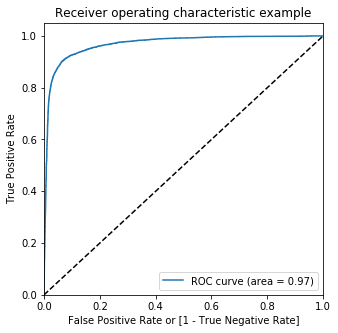

In [237]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Area under ROC curve is pretty high almost equal to 0.97.

In [238]:
# Let's create columns with different probability cutoffs (0 < x < 1)
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.108761,0,1,1,0,0,0,0,0,0,0,0
1,0,0.138344,0,1,1,0,0,0,0,0,0,0,0
2,0,0.416209,0,1,1,1,1,1,0,0,0,0,0
3,0,0.336189,0,1,1,1,1,0,0,0,0,0,0
4,0,0.038326,0,1,0,0,0,0,0,0,0,0,0


In [239]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [240]:
# Confusion Matrix
print(cm1)

[[14168   154]
 [ 3569  4993]]


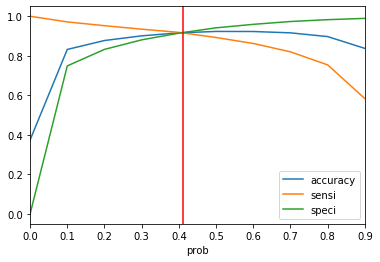

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.41,color='r')
plt.show()

Thus, our optimal cutoff will be 0.41

In [254]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108761,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.138344,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.416209,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.336189,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.038326,0,1,0,0,0,0,0,0,0,0,0,0


In [255]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),4)

0.9172

In [256]:
round(metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),4)

0.9163

### Precision Recall Tradeoff

In [248]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

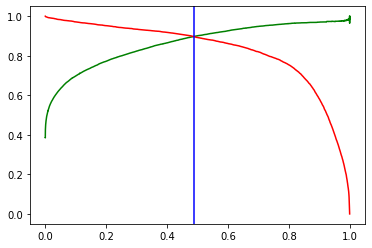

In [253]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.49,color='b')
plt.show()

Let us choose our optimal cut off as 0.49.

In [257]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108761,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.138344,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.416209,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.336189,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.038326,0,1,0,0,0,0,0,0,0,0,0,0


In [258]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),4)

0.9233

In [259]:
round(metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),4)

0.8965

Since, we want our recall score to be high, we go with cutoff as 0.41.

In [260]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108761,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.138344,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.416209,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.336189,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.038326,0,1,0,0,0,0,0,0,0,0,0,0


### Evaluating on Test Set

In [261]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

#Creating a DataFrame of the original target variable and Purchase Probability 
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})

In [270]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [271]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted),4)

0.8449

In [272]:
#roc_auc score
round(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted),4)

0.853

In [273]:
# Let's check the sensitivity.
round(metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted),4)

0.8617

In [274]:
# Let's check the precision.
round(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted),4)

0.1601

In [275]:
model_metrics.loc['Logistic Regression with PCA with sampling','Training Accuracy']=metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression with PCA with sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics.loc['Logistic Regression with PCA with sampling','Training Recall']=metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression with PCA with sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics.loc['Logistic Regression with PCA with sampling','Training Precision']=metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
model_metrics.loc['Logistic Regression with PCA with sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)
model_metrics

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.186470
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.035750
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1.000000,0.438735,0.669694,0.290576
AdaBoost with PCA with sampling,0.968366,0.938034,1.000000,0.513834,0.512598,0.271967
Random Forest with PCA with Sampling,0.899624,0.897908,0.796076,0.715415,0.925207,0.204520
XGBoost with PCA,0.991485,0.962110,0.783051,0.292490,0.952577,0.404372
Logistic Regression with PCA with sampling,0.917191,0.844889,0.916258,0.861660,0.869445,0.160059


In [276]:
model_metrics.style.background_gradient(cmap='YlGn')

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision
Logistic Regression without PCA with sampling,0.864997,0.871596,0.864501,0.849802,0.865359,0.18647
Random Forest without PCA without sampling,0.894948,0.112485,0.954237,0.988142,0.234681,0.03575
Random Forest with PCA without Sampling,0.770948,0.774503,0.798305,0.786561,0.106706,0.107047
AdaBoost with PCA without sampling,0.983591,0.945665,1,0.438735,0.669694,0.290576
AdaBoost with PCA with sampling,0.968366,0.938034,1,0.513834,0.512598,0.271967
Random Forest with PCA with Sampling,0.899624,0.897908,0.796076,0.715415,0.925207,0.20452
XGBoost with PCA,0.991485,0.96211,0.783051,0.29249,0.952577,0.404372
Logistic Regression with PCA with sampling,0.917191,0.844889,0.916258,0.86166,0.869445,0.160059


In [277]:
model_metrics.T.style.background_gradient(cmap='YlGn')

,Logistic Regression without PCA with sampling,Random Forest without PCA without sampling,Random Forest with PCA without Sampling,AdaBoost with PCA without sampling,AdaBoost with PCA with sampling,Random Forest with PCA with Sampling,XGBoost with PCA,Logistic Regression with PCA with sampling
Training Accuracy,0.864997,0.894948,0.770948,0.983591,0.968366,0.899624,0.991485,0.917191
Test Accuracy,0.871596,0.112485,0.774503,0.945665,0.938034,0.897908,0.96211,0.844889
Training Recall,0.864501,0.954237,0.798305,1,1,0.796076,0.783051,0.916258
Test Recall,0.849802,0.988142,0.786561,0.438735,0.513834,0.715415,0.29249,0.86166
Training Precision,0.865359,0.234681,0.106706,0.669694,0.512598,0.925207,0.952577,0.869445
Test Precision,0.18647,0.03575,0.107047,0.290576,0.271967,0.20452,0.404372,0.160059


After PCA, the best model to use is Random Forest without Sampling using class_weight='balanced' argument since it has the maximum recall score and minimal overfitting. 
<br>
<br>
***Note:*** 
- ***We compensate with low precision score since the cost of False Positives is low. Our Ultimate Goal is to retain high value customers. Thus, even if we introduce some special schemes for the customers who are not churning, we are just treating our good customers well and the revenue of these customers would be high.***
- ***However, if our recall is low and we lose high revenue customers, the company faces significant loss. Hence, we do not want to falsely predict churners as non-churn. Thus, we have to minimize our False Negatives and thus maximize Recall Score.***


Hence, we go with rf_final (Random Forest without sampling using class_weight='balanced') model.

# Recommended Strategies

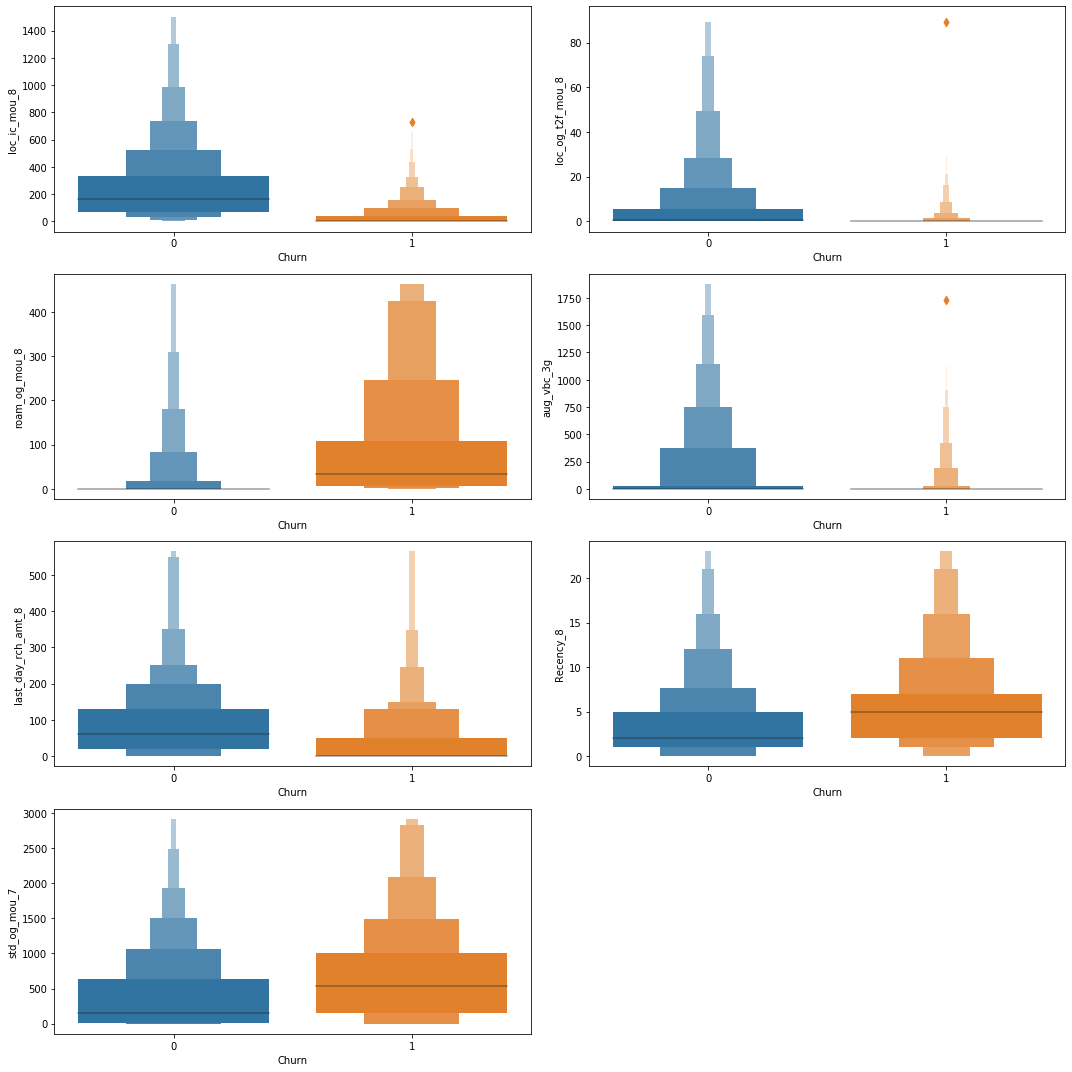

In [278]:
imp_col=['loc_ic_mou_8','loc_og_t2f_mou_8','roam_og_mou_8','aug_vbc_3g','last_day_rch_amt_8','Recency_8','std_og_mou_7']
i=1
plt.figure(figsize=(15,15))
for col in imp_col:
    plt.subplot(4,2,i)
    sns.boxenplot(y=fdf[col],x=fdf['Churn'])
    i+=1
plt.tight_layout()
plt.show()

Top 7 important variables affecting the churn are as follows:

- loc_ic_mou_8 (negatively related)
- loc_og_t2f_mou_8 (negatively related)
- roam_og_mou_8 (positively related)
- aug_vbc_3g (negatively related)
- last_day_rch_amt_8 (negatively related)
- Recency_8 (positively related)
- std_og_mou_7 (positively related)
<br>
<br>

**If the telecom company wants to retain high value customers, the company should provide special schemes or plans for customers in following call situations:**

- **Local Outgoing calls from Operator T to fixed lines of T (since loc_og_t2f_mou_8 is negatively related to churn, so as the minutes of usage in this case increase, the probability of retaining these customers increases)**
- **We also notice that as mintues of usage of roaming outgoing calls increase in August, the probability of Churn also increases and the customer is also not using special data plans in August since aug_vbc_3g also increases. This happened because possibly the customer has changed his location and needs a new sim card because of the location change. Thus, the company should have provisions to provide a new area connection on the same number or some special plans if a customer changes his/her location.**
- **We also notice that the probability to Churn increases as Recency_8 increases,that is, as the number of days since the last recharge in the month of August increases, the probability to Churn increases. Hence, we should identify the customers who have had significant time since last recharge and provide special schemes for them.***